<a href="https://colab.research.google.com/github/GFDRR/disaster-fcv-colocation-mapping/blob/master/examples/demo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Setup

Note: after running the first cell, you will be prompted to restart the session. Hit `Restart session` and continue running the rest of the cells.

In [ ]:
!pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple/ dfcv-colocation-mapping==0.3.7

In [ ]:
!apt install gdal-bin

In [4]:
import warnings
warnings.filterwarnings(action="ignore", message=r"datetime.datetime.utcnow")

from dfcv_colocation_mapping import data_download
from dfcv_colocation_mapping import data_utils
from dfcv_colocation_mapping import map_utils

import re
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

## Download Datasets

In [5]:
iso_code = "SSD (South Sudan)"  # @param ["ABW (Aruba)", "AGO (Angola)", "AIA (Anguilla)", "ARG (Argentina)", "ATG (Antigua and Barbuda)", "BDI (Burundi)", "BEN (Benin)", "BFA (Burkina Faso)", "BGD (Bangladesh)", "BHS (The Bahamas)", "BLM (Saint Barthelemy)", "BLZ (Belize)", "BOL (Bolivia)", "BRA (Brazil)", "BRB (Barbados)", "BRN (Brunei)", "BTN (Bhutan)", "BWA (Botswana)", "CAF (Central African Republic)", "CHL (Chile)", "CIV (Ivory Coast)", "CMR (Cameroon)", "COD (Democratic Republic of the Congo)", "COG (Republic of Congo)", "COL (Colombia)", "COM (Comoros)", "CPV (Cape Verde)", "CRI (Costa Rica)", "CUB (Cuba)", "CUW (Cura\u00e7ao)", "CYM (Cayman Islands)", "DJI (Djibouti)", "DMA (Dominica)", "DOM (Dominican Republic)", "DZA (Algeria)", "ECU (Ecuador)", "EGY (Egypt)", "ERI (Eritrea)", "ETH (Ethiopia)", "FLK (Falkland Islands)", "GAB (Gabon)", "GHA (Ghana)", "GIN (Guinea)", "GMB (Gambia)", "GNB (Guinea Bissau)", "GNQ (Equatorial Guinea)", "GRD (Grenada)", "GTM (Guatemala)", "GUY (Guyana)", "HND (Honduras)", "HTI (Haiti)", "IDN (Indonesia)", "IND (India)", "IOT (British Indian Ocean Territory)", "JAM (Jamaica)", "KEN (Kenya)", "KHM (Cambodia)", "KNA (Saint Kitts and Nevis)", "LAO (Laos)", "LBR (Liberia)", "LCA (Saint Lucia)", "LKA (Sri Lanka)", "LSO (Lesotho)", "MAF (Saint Martin)", "MDG (Madagascar)", "MDV (Maldives)", "MEX (Mexico)", "MOZ (Mozambique)", "MRT (Mauritania)", "MSR (Montserrat)", "MUS (Mauritius)", "MWI (Malawi)", "MYS (Malaysia)", "MYT (Mayotte)", "NAM (Namibia)", "NER (Niger)", "NGA (Nigeria)", "NIC (Nicaragua)", "NPL (Nepal)", "PAN (Panama)", "PER (Peru)", "PHL (Philippines)", "PRI (Puerto Rico)", "PRY (Paraguay)", "RWA (Rwanda)", "SDN (Sudan)", "SEN (Senegal)", "SGP (Singapore)", "SHN (Saint Helena)", "SLE (Sierra Leone)", "SLV (El Salvador)", "SOM (Somalia)", "SSD (South Sudan)", "STP (Sao Tome and Principe)", "SUR (Suriname)", "SWZ (Eswatini)", "SXM (Sint Maarten)", "SYC (Seychelles)", "TCA (Turks and Caicos Islands)", "TGO (Togo)", "THA (Thailand)", "TLS (East Timor)", "TTO (Trinidad and Tobago)", "TUN (Tunisia)", "TZA (United Republic of Tanzania)", "UGA (Uganda)", "URY (Uruguay)", "VCT (Saint Vincent and the Grenadines)", "VEN (Venezuela)", "VGB (British Virgin Islands)", "VIR (United States Virgin Islands)", "VNM (Vietnam)", "ZAF (South Africa)", "ZMB (Zambia)", "ZWE (Zimbabwe)"]
iso_code = re.sub(r'\([^)]*\)', '', iso_code).strip()
adm_level = "ADM3" # @param ["ADM1", "ADM2", "ADM3"]

conflict_start_date = "2015-01-01" # @param {type: "date"}
conflict_end_date = "2025-01-01" # @param {type: "date"}

mhs_aggregation= "power_mean" # @param ["power_mean", "arithmetic_mean", "geometric_mean"]

acled_key = None # @param {type: "string"}
acled_email = None # @param {type: "string"}

dm = data_download.DatasetManager(
    iso_code,
    adm_level=adm_level,
    conflict_start_date=conflict_start_date,
    conflict_end_date=conflict_end_date,
    mhs_aggregation=mhs_aggregation,
    acled_key=acled_key,
    acled_email=acled_email
)
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values(f"mhs_ucdp_worldpop_exposure_relative", ascending=False).head(3)

INFO:root:Loading geoboundary...
INFO:root:Downloading geoboundary for SSD...
INFO:pyogrio._io:Created 10 records
INFO:root:Geoboundary file saved to /content/data/SSD/SSD_ADM1.geojson.
INFO:pyogrio._io:Created 79 records
INFO:root:Geoboundary file saved to /content/data/SSD/SSD_ADM2.geojson.
INFO:root:Failed to download ADM3 boundaries: Expecting value: line 1 column 1 (char 0)
INFO:root:Loading geoboundaries failed. Trying again 0/3
INFO:root:Downloading geoboundary for SSD...
INFO:pyogrio._io:Created 10 records
INFO:root:Geoboundary file saved to /content/data/SSD/SSD_ADM1.geojson.
INFO:pyogrio._io:Created 79 records
INFO:root:Geoboundary file saved to /content/data/SSD/SSD_ADM2.geojson.
INFO:root:Failed to download ADM3 boundaries: Expecting value: line 1 column 1 (char 0)
INFO:root:Loading geoboundaries failed. Trying again 1/3
INFO:root:Downloading geoboundary for SSD...
INFO:pyogrio._io:Created 10 records
INFO:root:Geoboundary file saved to /content/data/SSD/SSD_ADM1.geojson.
IN

iso_code  ADM1_ID       ADM1    ADM2_ID      ADM2      ADM3_ID     ADM3       worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure  cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure  acled_population_best  acled_conflict_count  acled_fatalities  acled_null_conflict_count  acled_exposure  acled_fatalities_per_conflict  wbg_acled_worldpop_exposure  ucdp_conflict_count  ucdp_fatalities  ucdp_worldpop_exposure  ucdp_fatalities_per_conflict  earthquake_worldpop_exposure_relative  \
36      SSD  SSD.7_1  UpperNile  SSD.7.8_1     Tonga  SSD.7.8.1_1  Malakal  203092.703125  MULTIPOLYGON (((31.6422 9.2601, 31.5587 9.2509...    0.000000                           0.0                                              0.0        1.0                          0.0                                             0.0      0.0                        0.0                                           0.0 -1.846667              203092.703125                                   2638.039307  3019.565541                     394.320801                                        312.876862       2.297252                    156558.906250                                       14301.223633               2303431.0                   393             665.0                        193    11517.155000                       1.692112                111046.007812                 24.0            245.0            26403.238281                     10.208333                                    0.0   
25      SSD  SSD.6_1      Unity  SSD.6.1_1   AlLeiri  SSD.6.1.1_1  ElLeiri  232220.171875  MULTIPOLYGON (((30.5664 7.5121, 30.547 7.511, ...    0.002434                           0.0                                              0.0        1.0                          0.0                                             0.0      0.0                        0.0                                           0.0 -1.626714              232135.578125                                  32757.199219  2227.225244                    1246.985474                                        986.094543       1.429014                    183515.453125                                        9920.030273                492729.0                   592            2124.0                        323     1831.706320                       3.587838                 91814.976562                 89.0           1088.0            16003.029297                     12.224719                                    0.0   
32      SSD  SSD.7_1  UpperNile  SSD.7.4_1  Fashooda  SSD.7.4.1_1    Kodok   64908.933594  MULTIPOLYGON (((32.724 11.906, 32.738 11.872, ...    0.000000                           0.0                                              0.0        1.0                          0.0                                             0.0      0.0                        0.0                                           0.0 -1.405555               64636.511719                                   9219.941406  3157.032769                   19124.162109                                      15897.871094       1.440741                     39898.402344                                        2447.752197                 43388.0                    79             362.0                         42     1172.648649                       4.582278                 16054.113281                 10.0            191.0             2534.170898                     19.100000                                    0.0   

    earthquake_worldpop_intensity_weighted_exposure_relative  landslide_worldpop_expos

## AHP Weight Calculation [Optional]

In [ ]:
dm.calculate_ahp()
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values("mhs_worldpop_exposure_relative", ascending=False).head(3)

How much more important is earthquake compared to landslide: 1
How much more important is earthquake compared to cyclone: 1
How much more important is earthquake compared to drought: 1
How much more important is earthquake compared to heat_stress: 1
How much more important is earthquake compared to fluvial_flood: 1
How much more important is landslide compared to cyclone: 1
How much more important is landslide compared to drought: 1
How much more important is landslide compared to heat_stress: 1
How much more important is landslide compared to fluvial_flood: 1
How much more important is cyclone compared to drought: 1
How much more important is cyclone compared to heat_stress: 1
How much more important is cyclone compared to fluvial_flood: 1
How much more important is drought compared to heat_stress: 1
How much more important is drought compared to fluvial_flood: 1
How much more important is heat_stress compared to fluvial_flood: 1


INFO:root:Consistency_ratio: 0.0
INFO:root:{'earthquake': 0.16667, 'landslide': 0.16667, 'cyclone': 0.16667, 'drought': 0.16667, 'heat_stress': 0.16667, 'fluvial_flood': 0.16667}


iso_code          ADM3                  ADM3_ID                  ADM2_ID    ADM2                  ADM1_ID              ADM1      worldpop                                           geometry  earthquake  earthquake_worldpop_exposure  earthquake_worldpop_intensity_weighted_exposure  landslide  landslide_worldpop_exposure  landslide_worldpop_intensity_weighted_exposure   cyclone  cyclone_worldpop_exposure  cyclone_worldpop_intensity_weighted_exposure   drought  drought_worldpop_exposure  drought_worldpop_intensity_weighted_exposure  heat_stress  heat_stress_worldpop_exposure  heat_stress_worldpop_intensity_weighted_exposure  fluvial_flood  fluvial_flood_worldpop_exposure  fluvial_flood_worldpop_intensity_weighted_exposure  ucdp_conflict_count  ucdp_worldpop_exposure  earthquake_worldpop_exposure_relative  earthquake_worldpop_intensity_weighted_exposure_relative  landslide_worldpop_exposure_relative  landslide_worldpop_intensity_weighted_exposure_relative  \
215      RWA       Nzahaha  94199721B94991292990707  40016504B69203145422490  Rusizi  46589978B43518966718904  Western Province  29433.472656  POLYGON ((29.00724 -2.67952, 29.00693 -2.67955...    0.246160                  29433.472656                                     27408.558594   3.115789                 21452.324219                                    18870.675781  0.000000                        0.0                                           0.0  0.867664                        0.0                                           0.0  1526.344828                    4134.367188                                       3853.103516          3.305                      3606.100830                                         669.691528                   NaN                     NaN                                    1.0                                           0.931204                                     0.728841                                           0.641130         
199      RWA      Bugarama  94199721B28126171529858  40016504B69203145422490  Rusizi  46589978B43518966718904  Western Province  31459.771484  POLYGON ((29.02501 -2.68467, 29.02497 -2.68469...    0.233319                  31459.771484                                     27851.310547   1.978723                 10111.617188                                     8990.614258  0.003393                        0.0                                           0.0  1.684446                        0.0                                           0.0  3327.325581                   14060.031250                                      13152.222656          5.280                      3648.251465                                         956.438965                   NaN                     NaN                                    1.0                                           0.885299                                     0.321414                                           0.285781         
205      RWA  Gikundamvura  94199721B67304354984819  40016504B69203145422490  Rusizi  46589978B43518966718904  Western Province  21893.207031  POLYGON ((29.04993 -2.68808, 29.04949 -2.68787...    0.250674                  21893.207031                                     20944.027344   2.623188                 13033.936523                                    10923.169922  0.003393                        0.0                                           0.0  1.389915                        0.0                                           0.0  2425.524590                    7728.642578                                       6872.612305          0.000                         0.000000                                           0.000000                   NaN             1364.876099                                    1.0                                           0.956645                                     0.595342                                           0.498930         

     cyclone_worldpop_exposure_relative  cyclone_worldpop_intensity_weighted_exposure_relative  drought_worldpop_ex

## Plot Geoboundaries

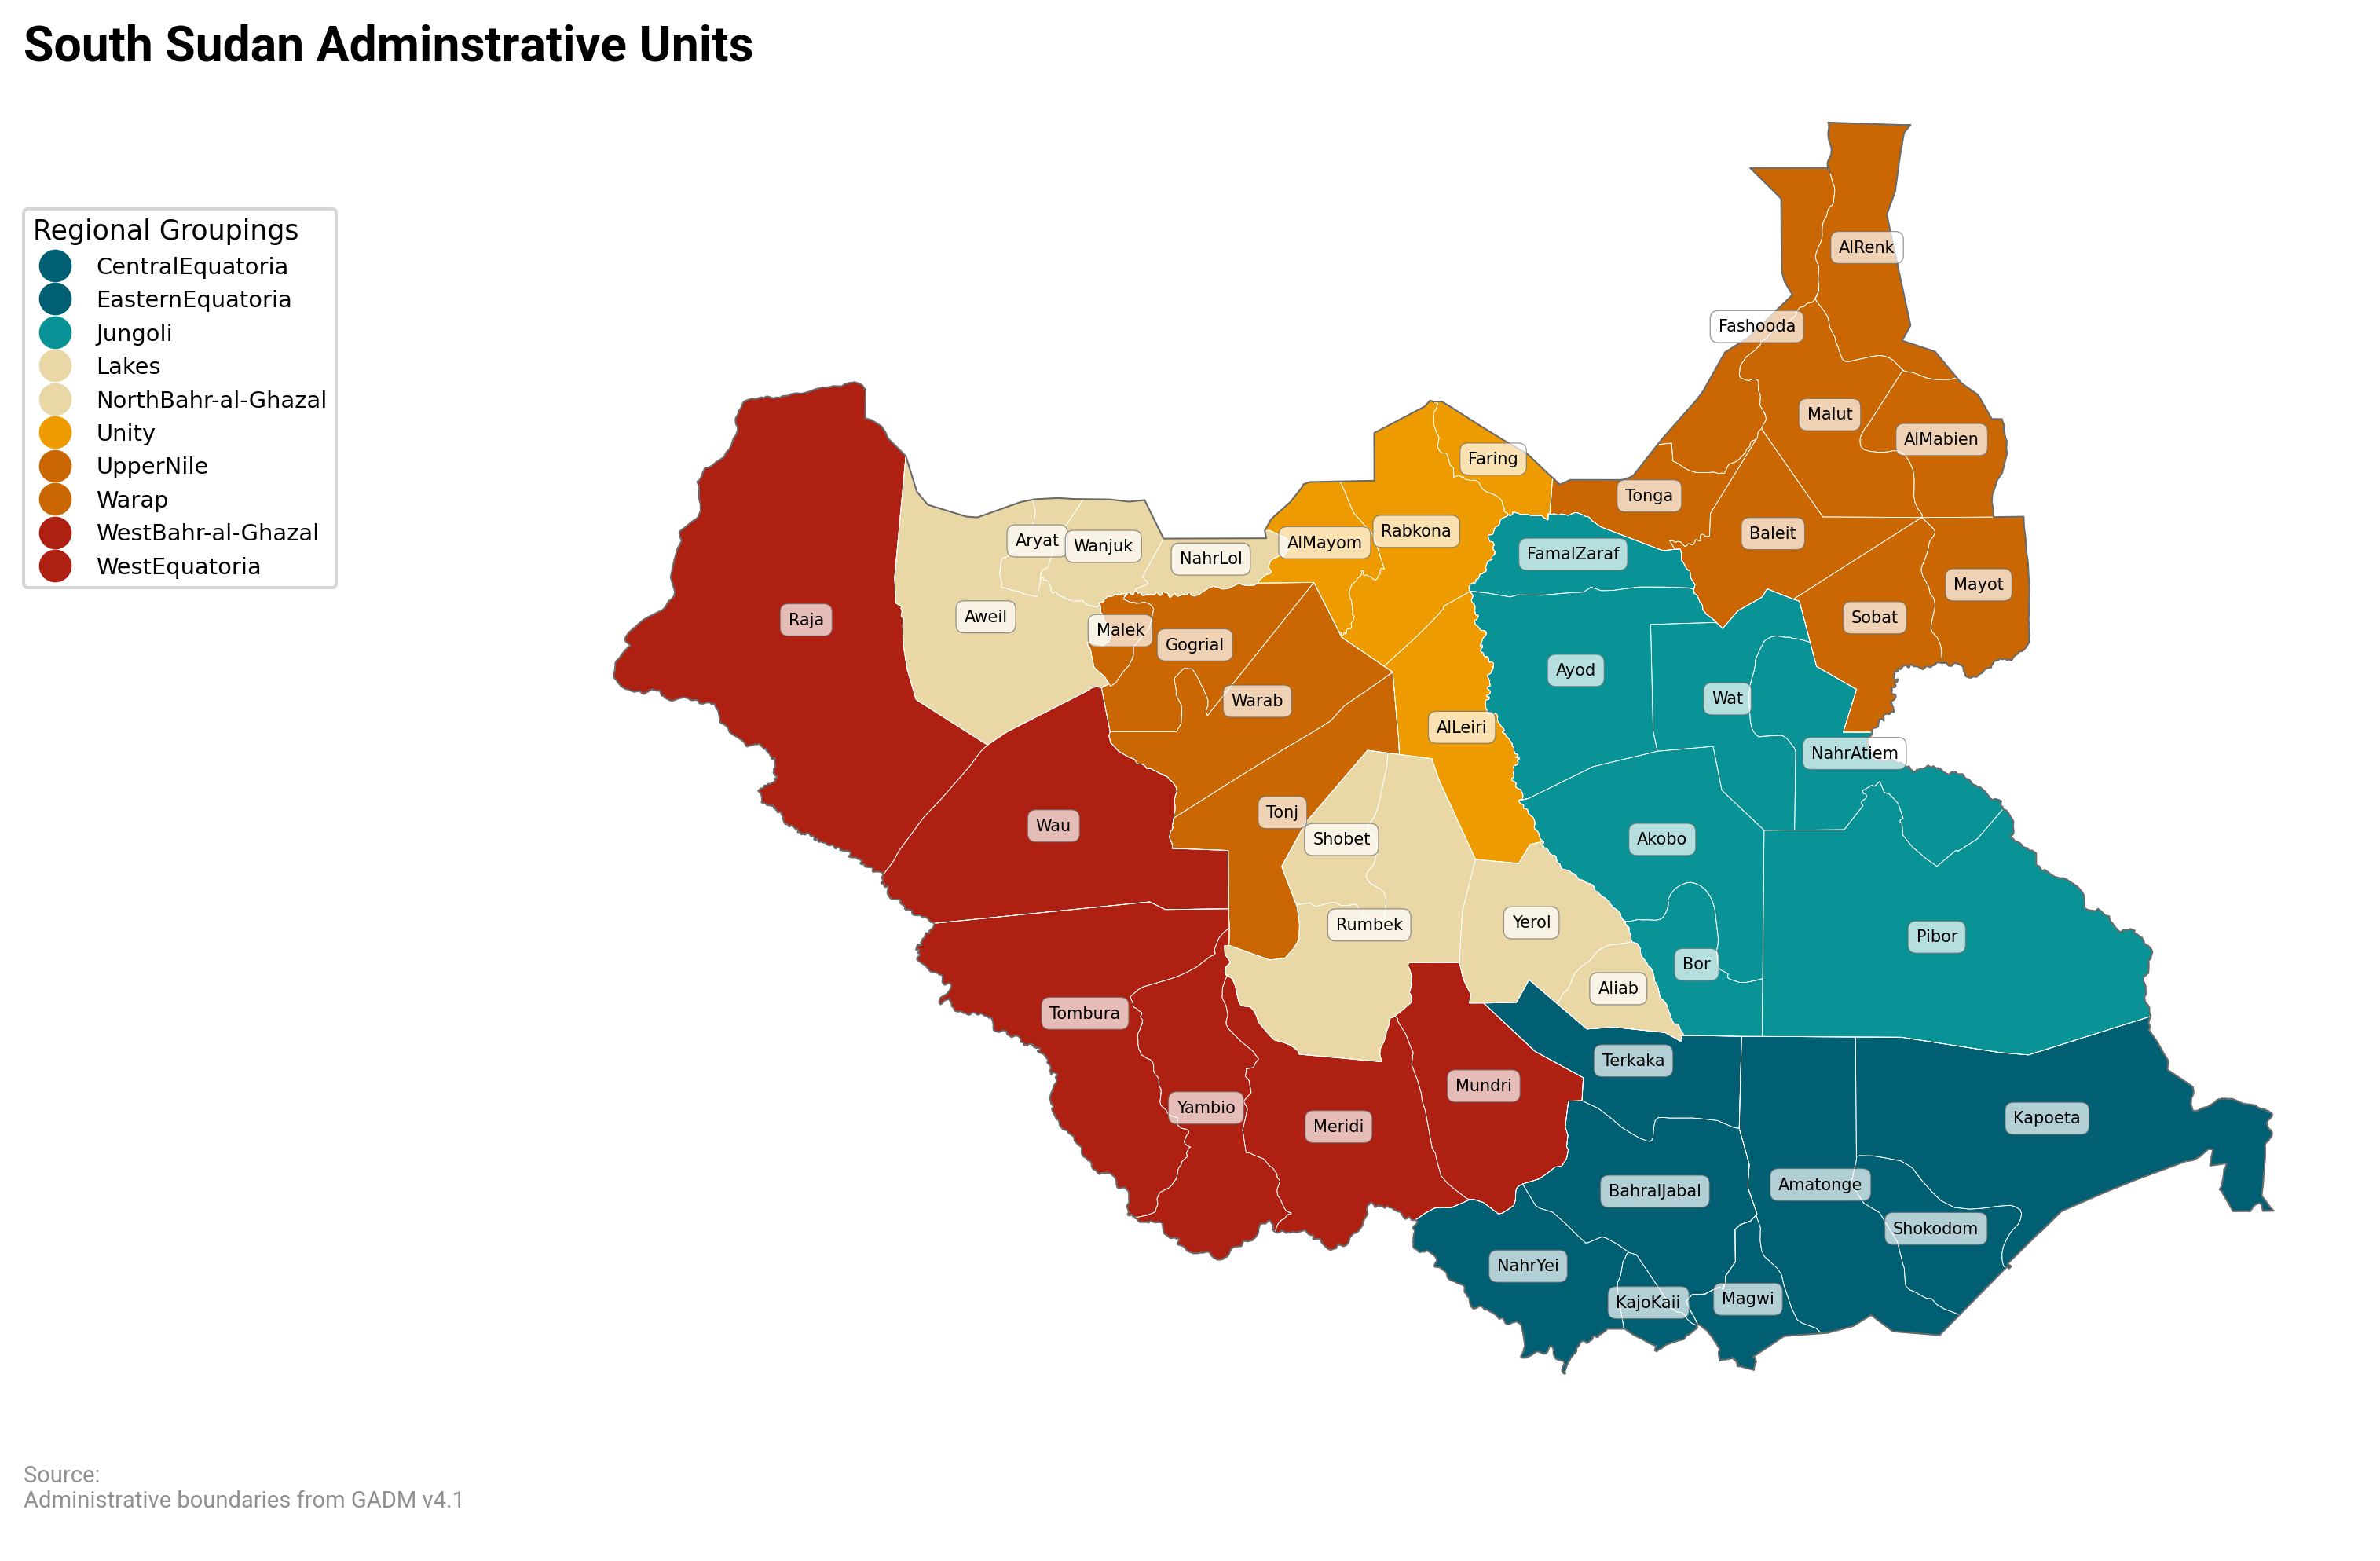

In [6]:
geoplot.plot_geoboundaries(
    adm_level="ADM2",
    group="ADM1"
);

## Plot Asset Distribution

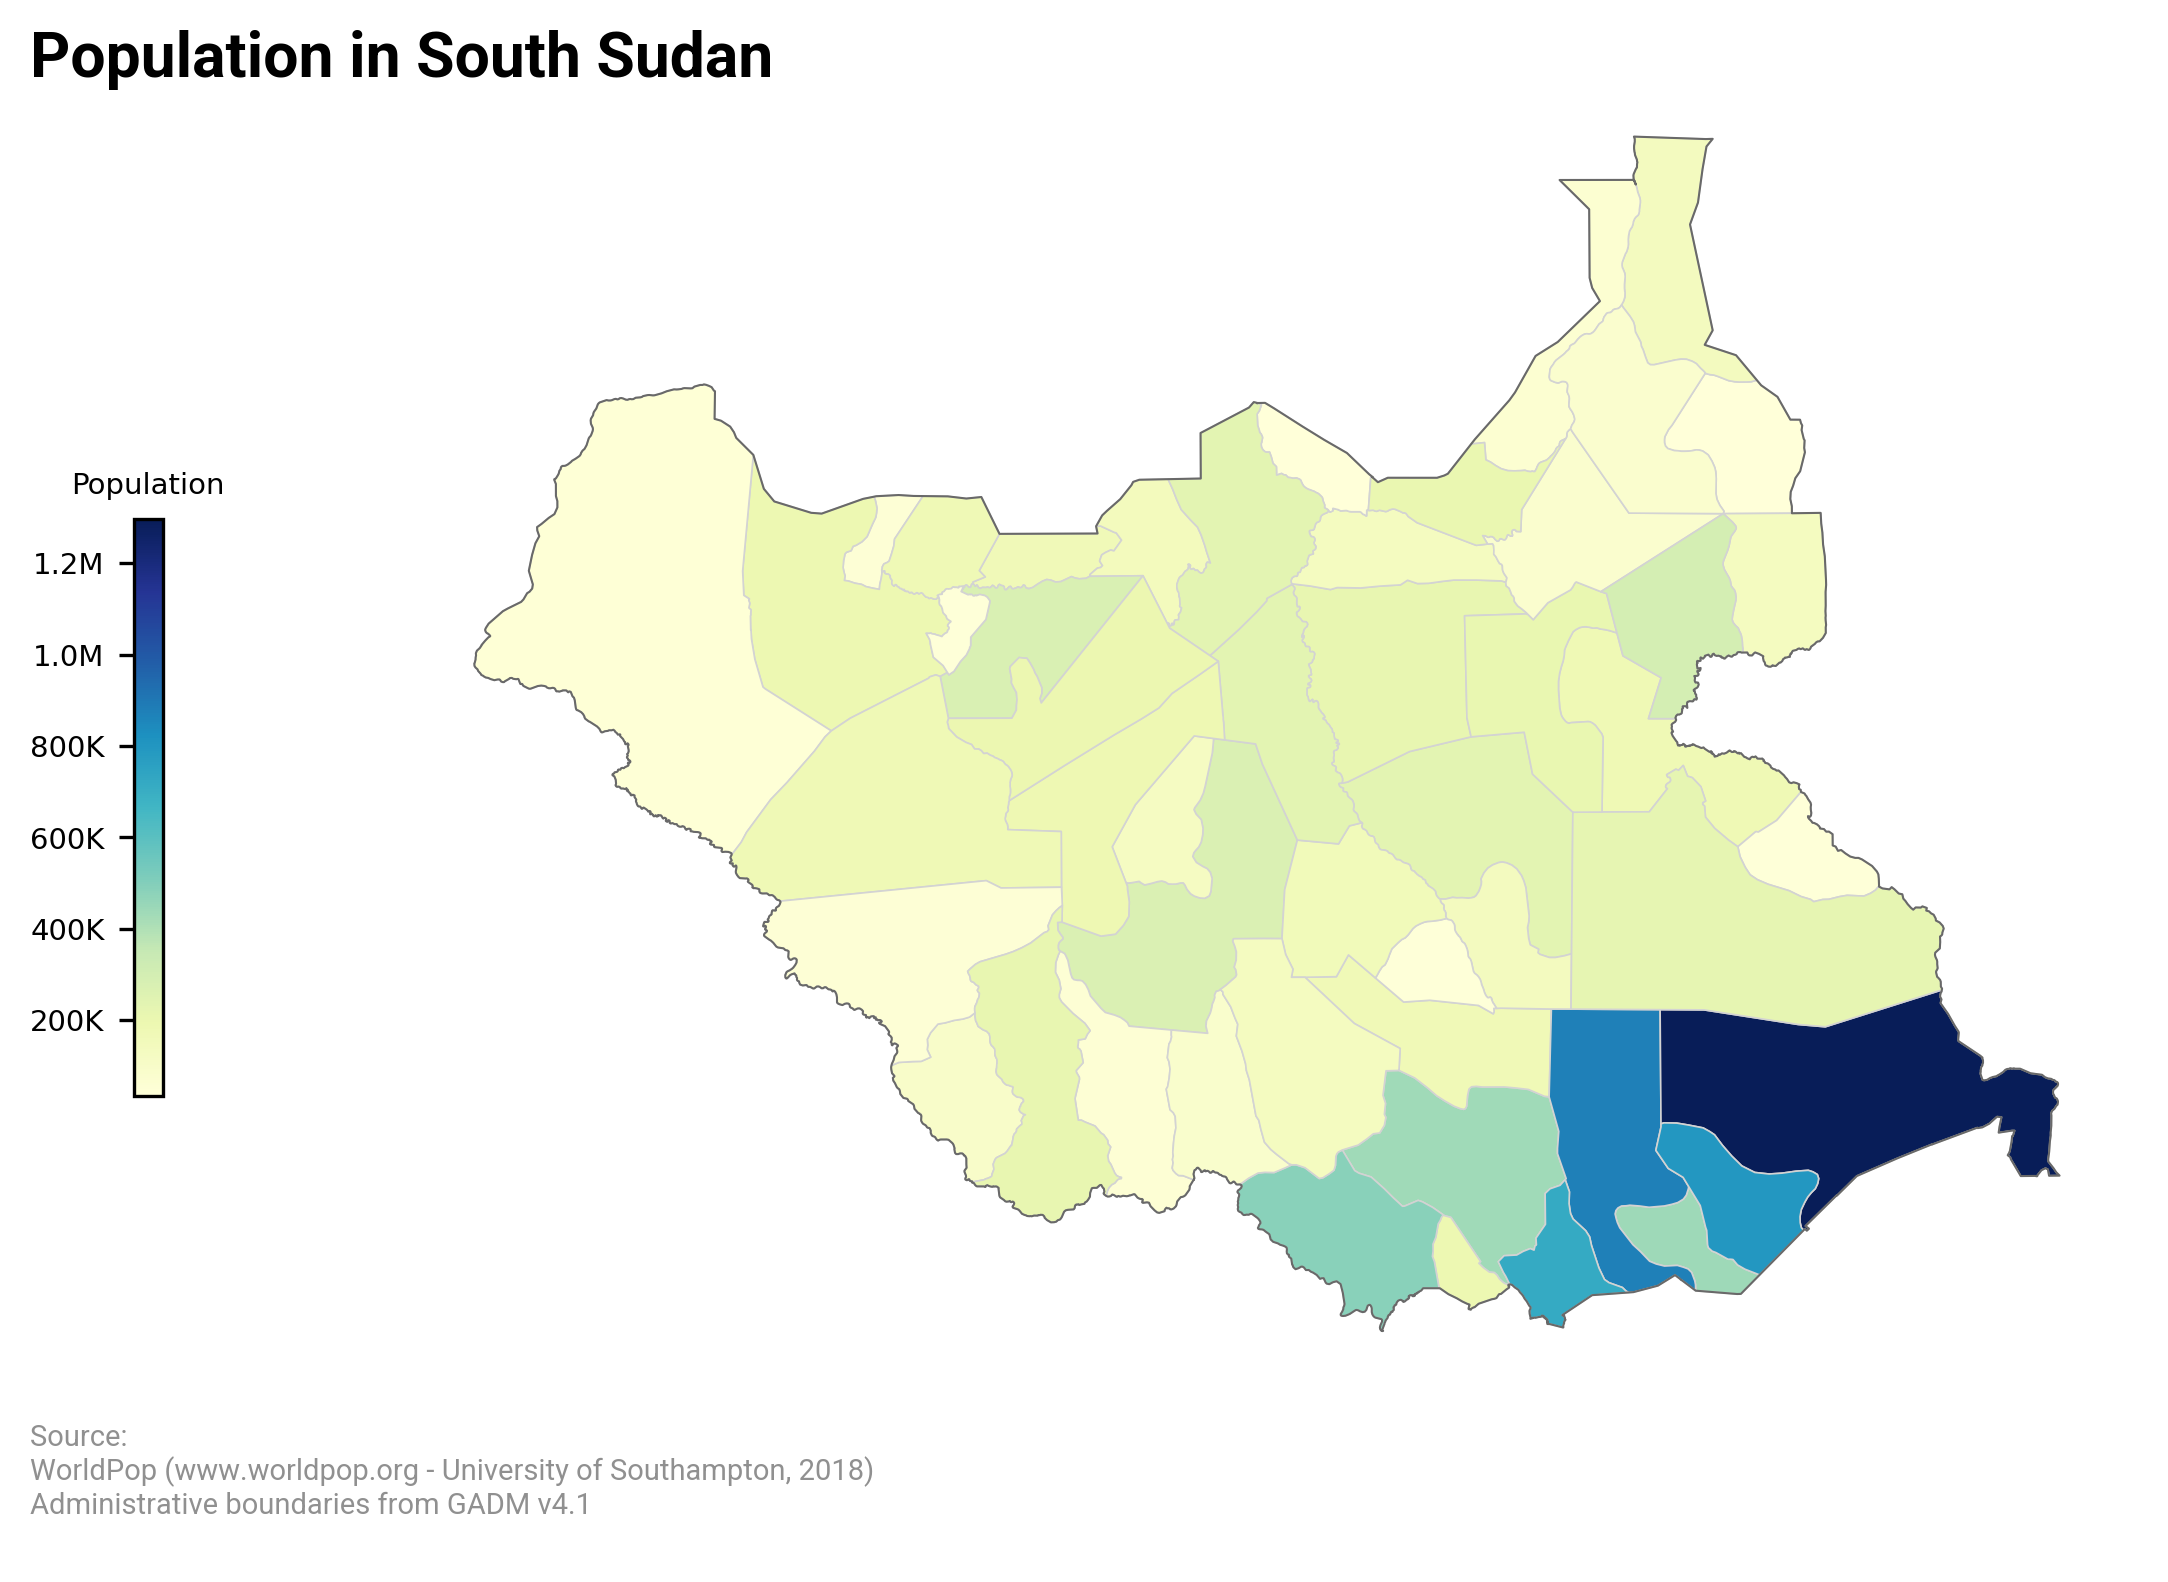

In [7]:
ax = geoplot.plot_choropleth(
    var="worldpop",
    kwargs={"legend_type": "colorbar"}
)

## Plot Conflict Stats

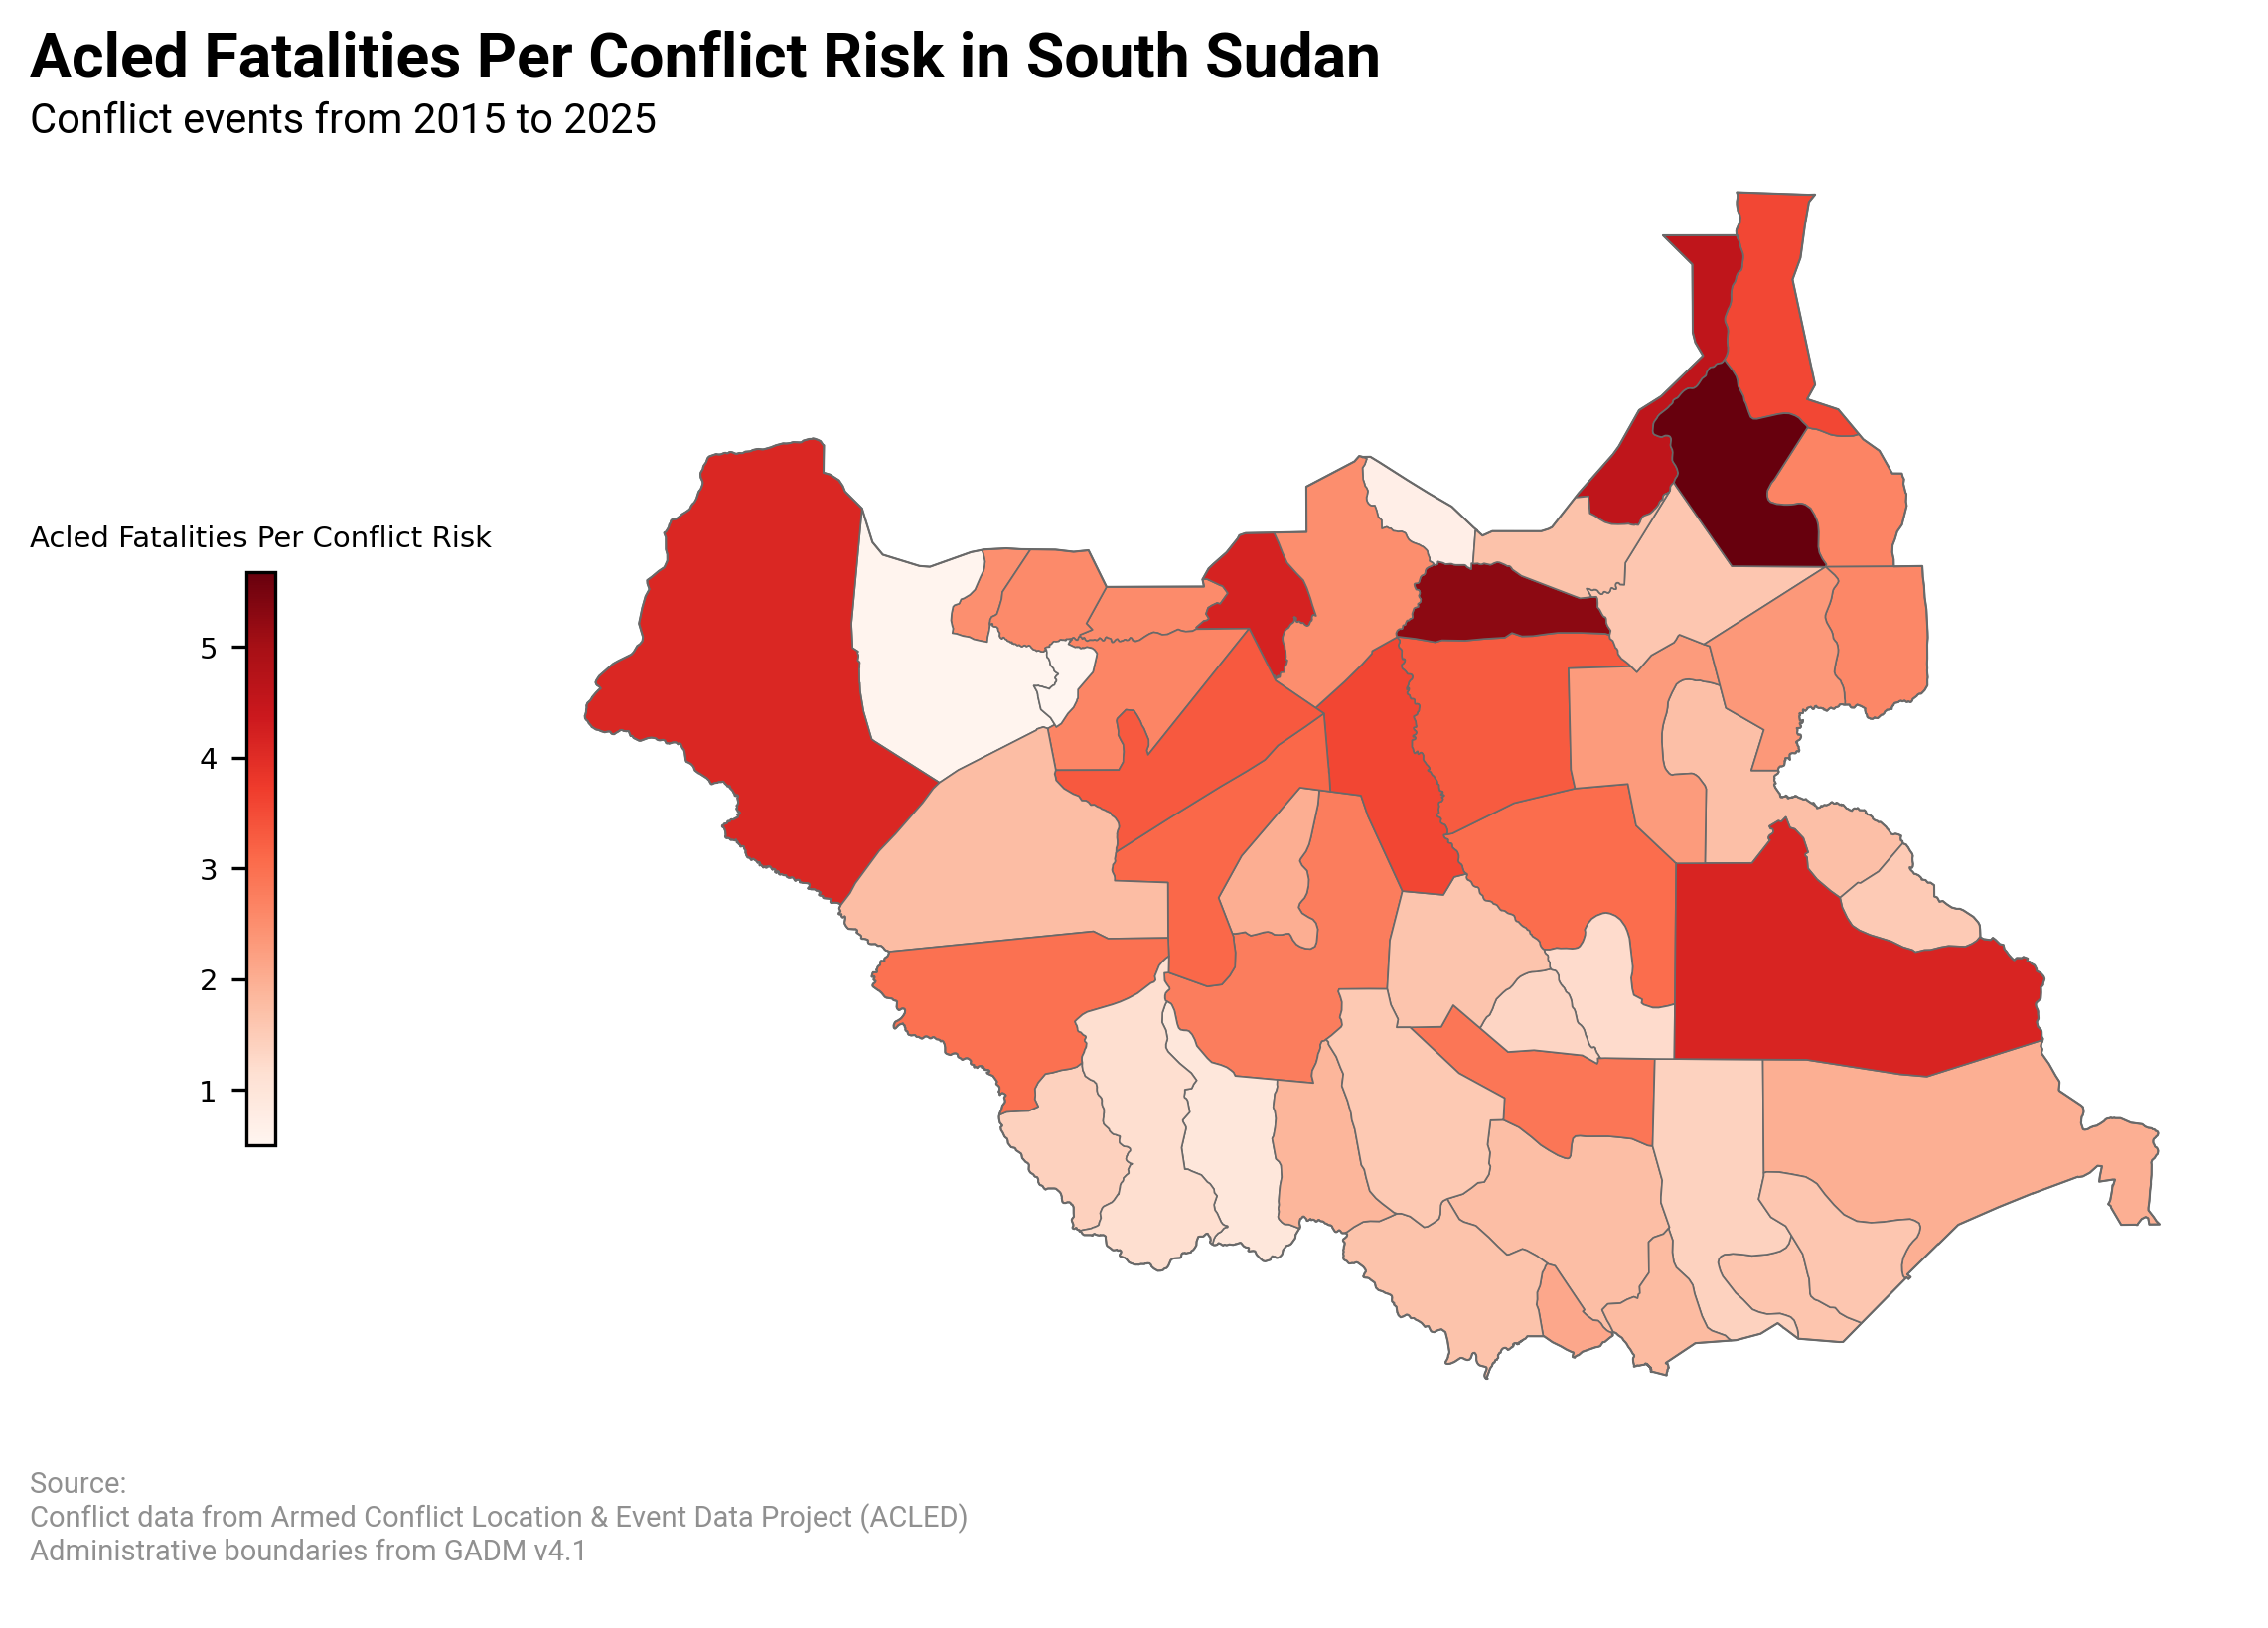

In [17]:
conflict_data_source = "ACLED" # @param ["ACLED", "UCDP"]
conflict_column = "fatalities_per_conflict" # @param ["conflict_count", "fatalities", "fatalities_per_conflict"]

ax, x = geoplot.plot_choropleth(
    var=f"{conflict_data_source.lower()}_{conflict_column}",
    kwargs={
        "legend_type": "colorbar",
        "palette_name": "Reds",
        "edgecolor": "dimgray"
    }
)

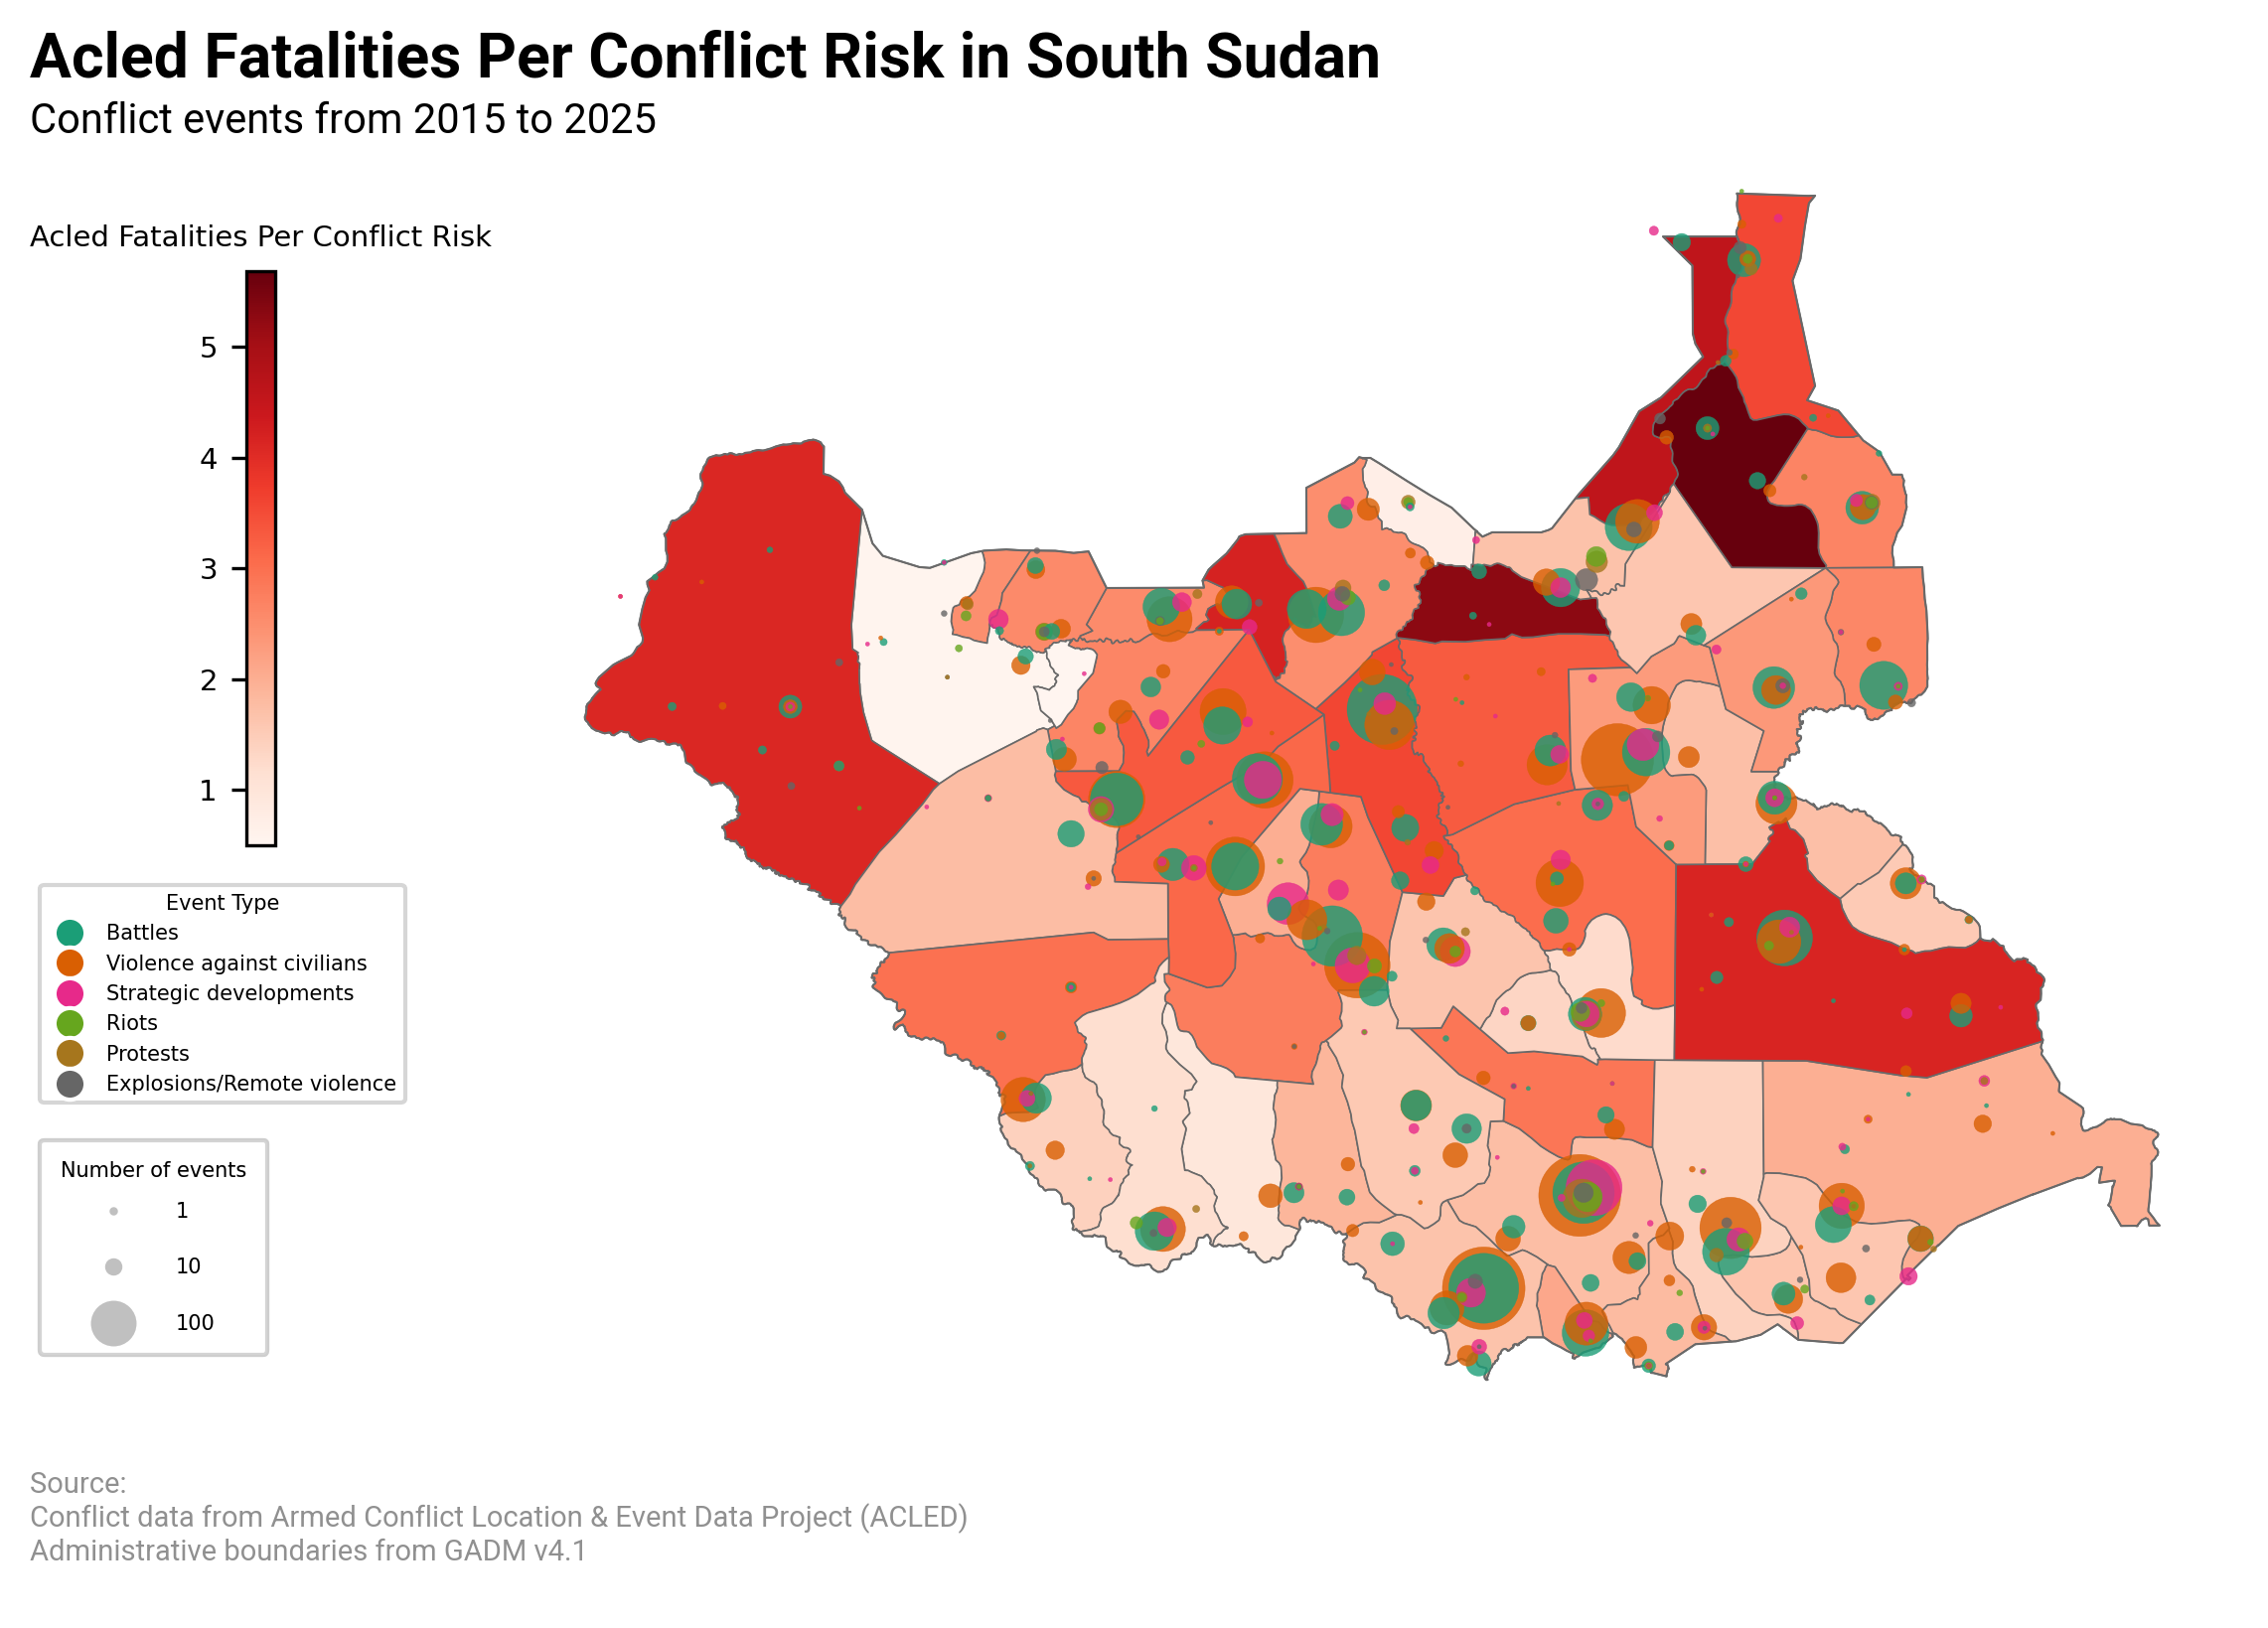

In [22]:
conflict_data_source = "ACLED" # @param ["ACLED", "UCDP"]
conflict_column = "fatalities_per_conflict" # @param ["conflict_count", "fatalities", "fatalities_per_conflict"]

clustering = True # @param {type: "boolean"}
conflict_event_column = "event_type" # @param ["disorder_type", "event_type", "sub_event_type", "type_of_violence"]

ax, x = geoplot.plot_choropleth(
    var=f"{conflict_data_source.lower()}_{conflict_column}",
    kwargs={
        "legend_type": "colorbar",
        "palette_name": "Reds",
        "edgecolor": "dimgray",
        "legend_y": 0.475
    }
)
geoplot.plot_points(
    conflict_event_column,
    dataset=conflict_data_source.lower(),
    clustering=clustering, ax=ax, xpos=x,
    kwargs={"legend_y": 0.425, "labelspacing": 1.75}
);

## Plot Conflict Exposure

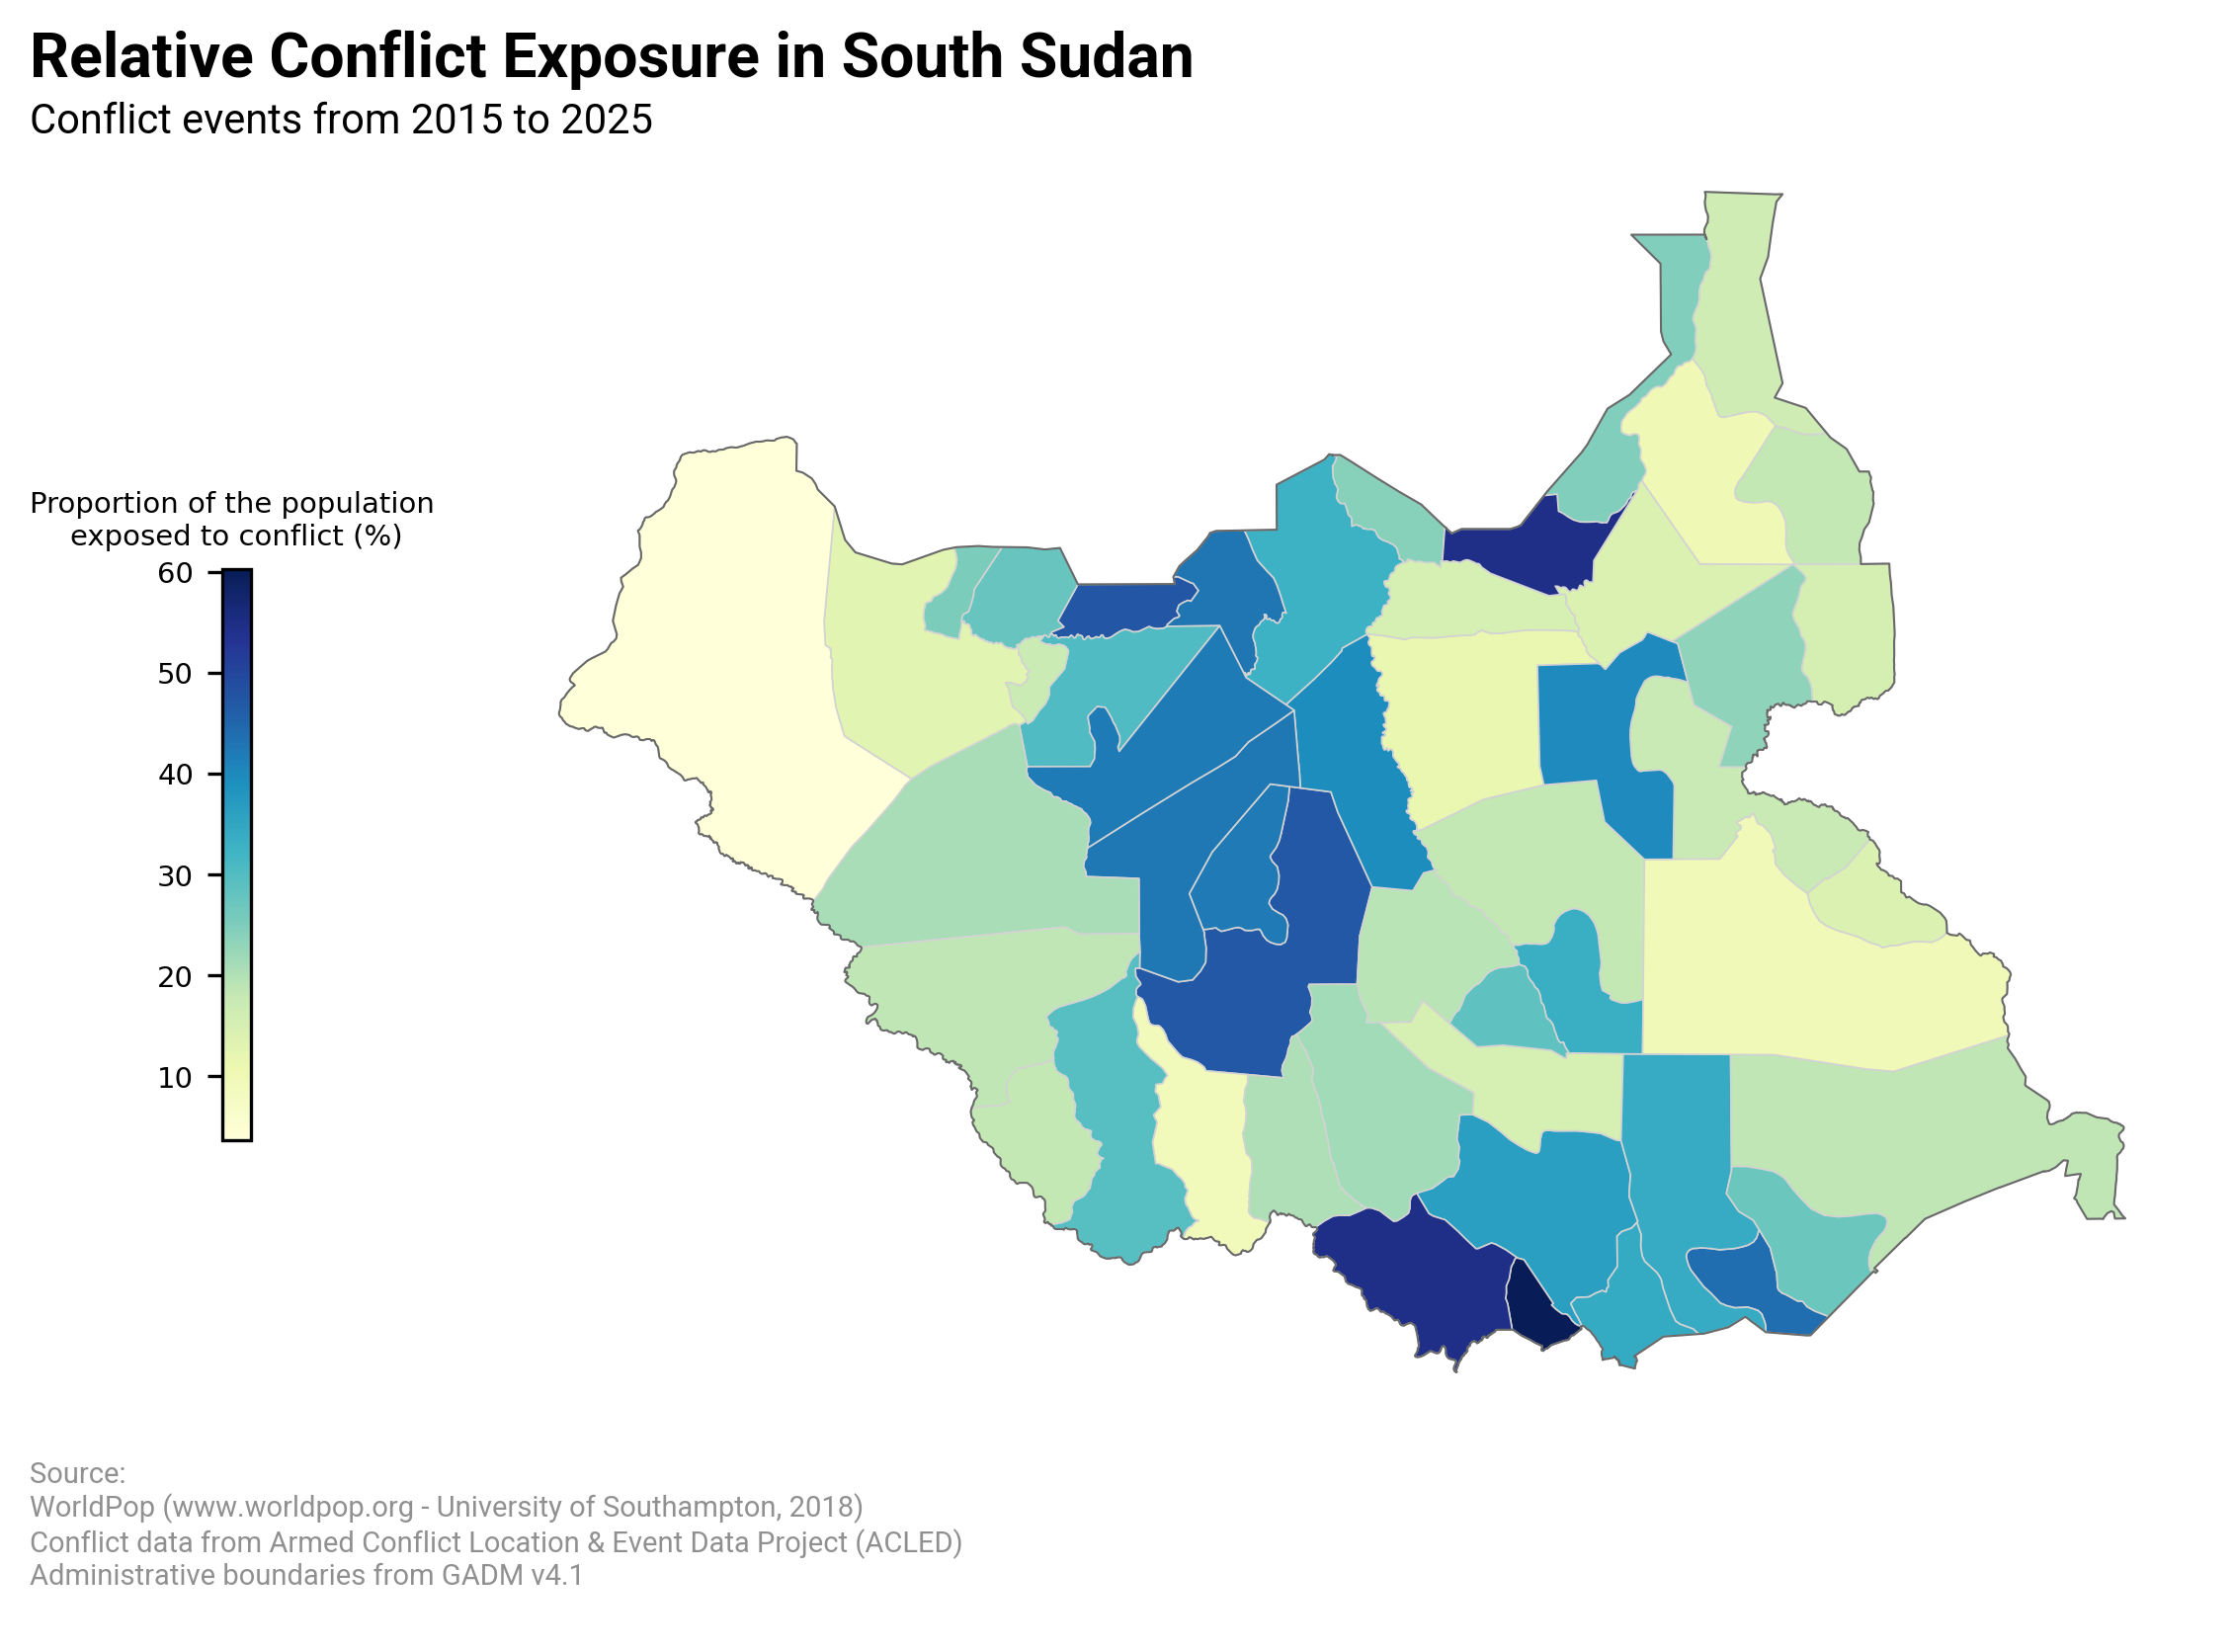

In [23]:
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (population_best)", "ACLED (WBG calculation)", "UCDP"]
exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
exposure = data_utils.get_exposure(dm, exposure)

ax, x = geoplot.plot_choropleth(
    var=f"{source}_{exposure}",
    kwargs={"legend_type": "colorbar"}
);

### Zoom choropleth to a specific region

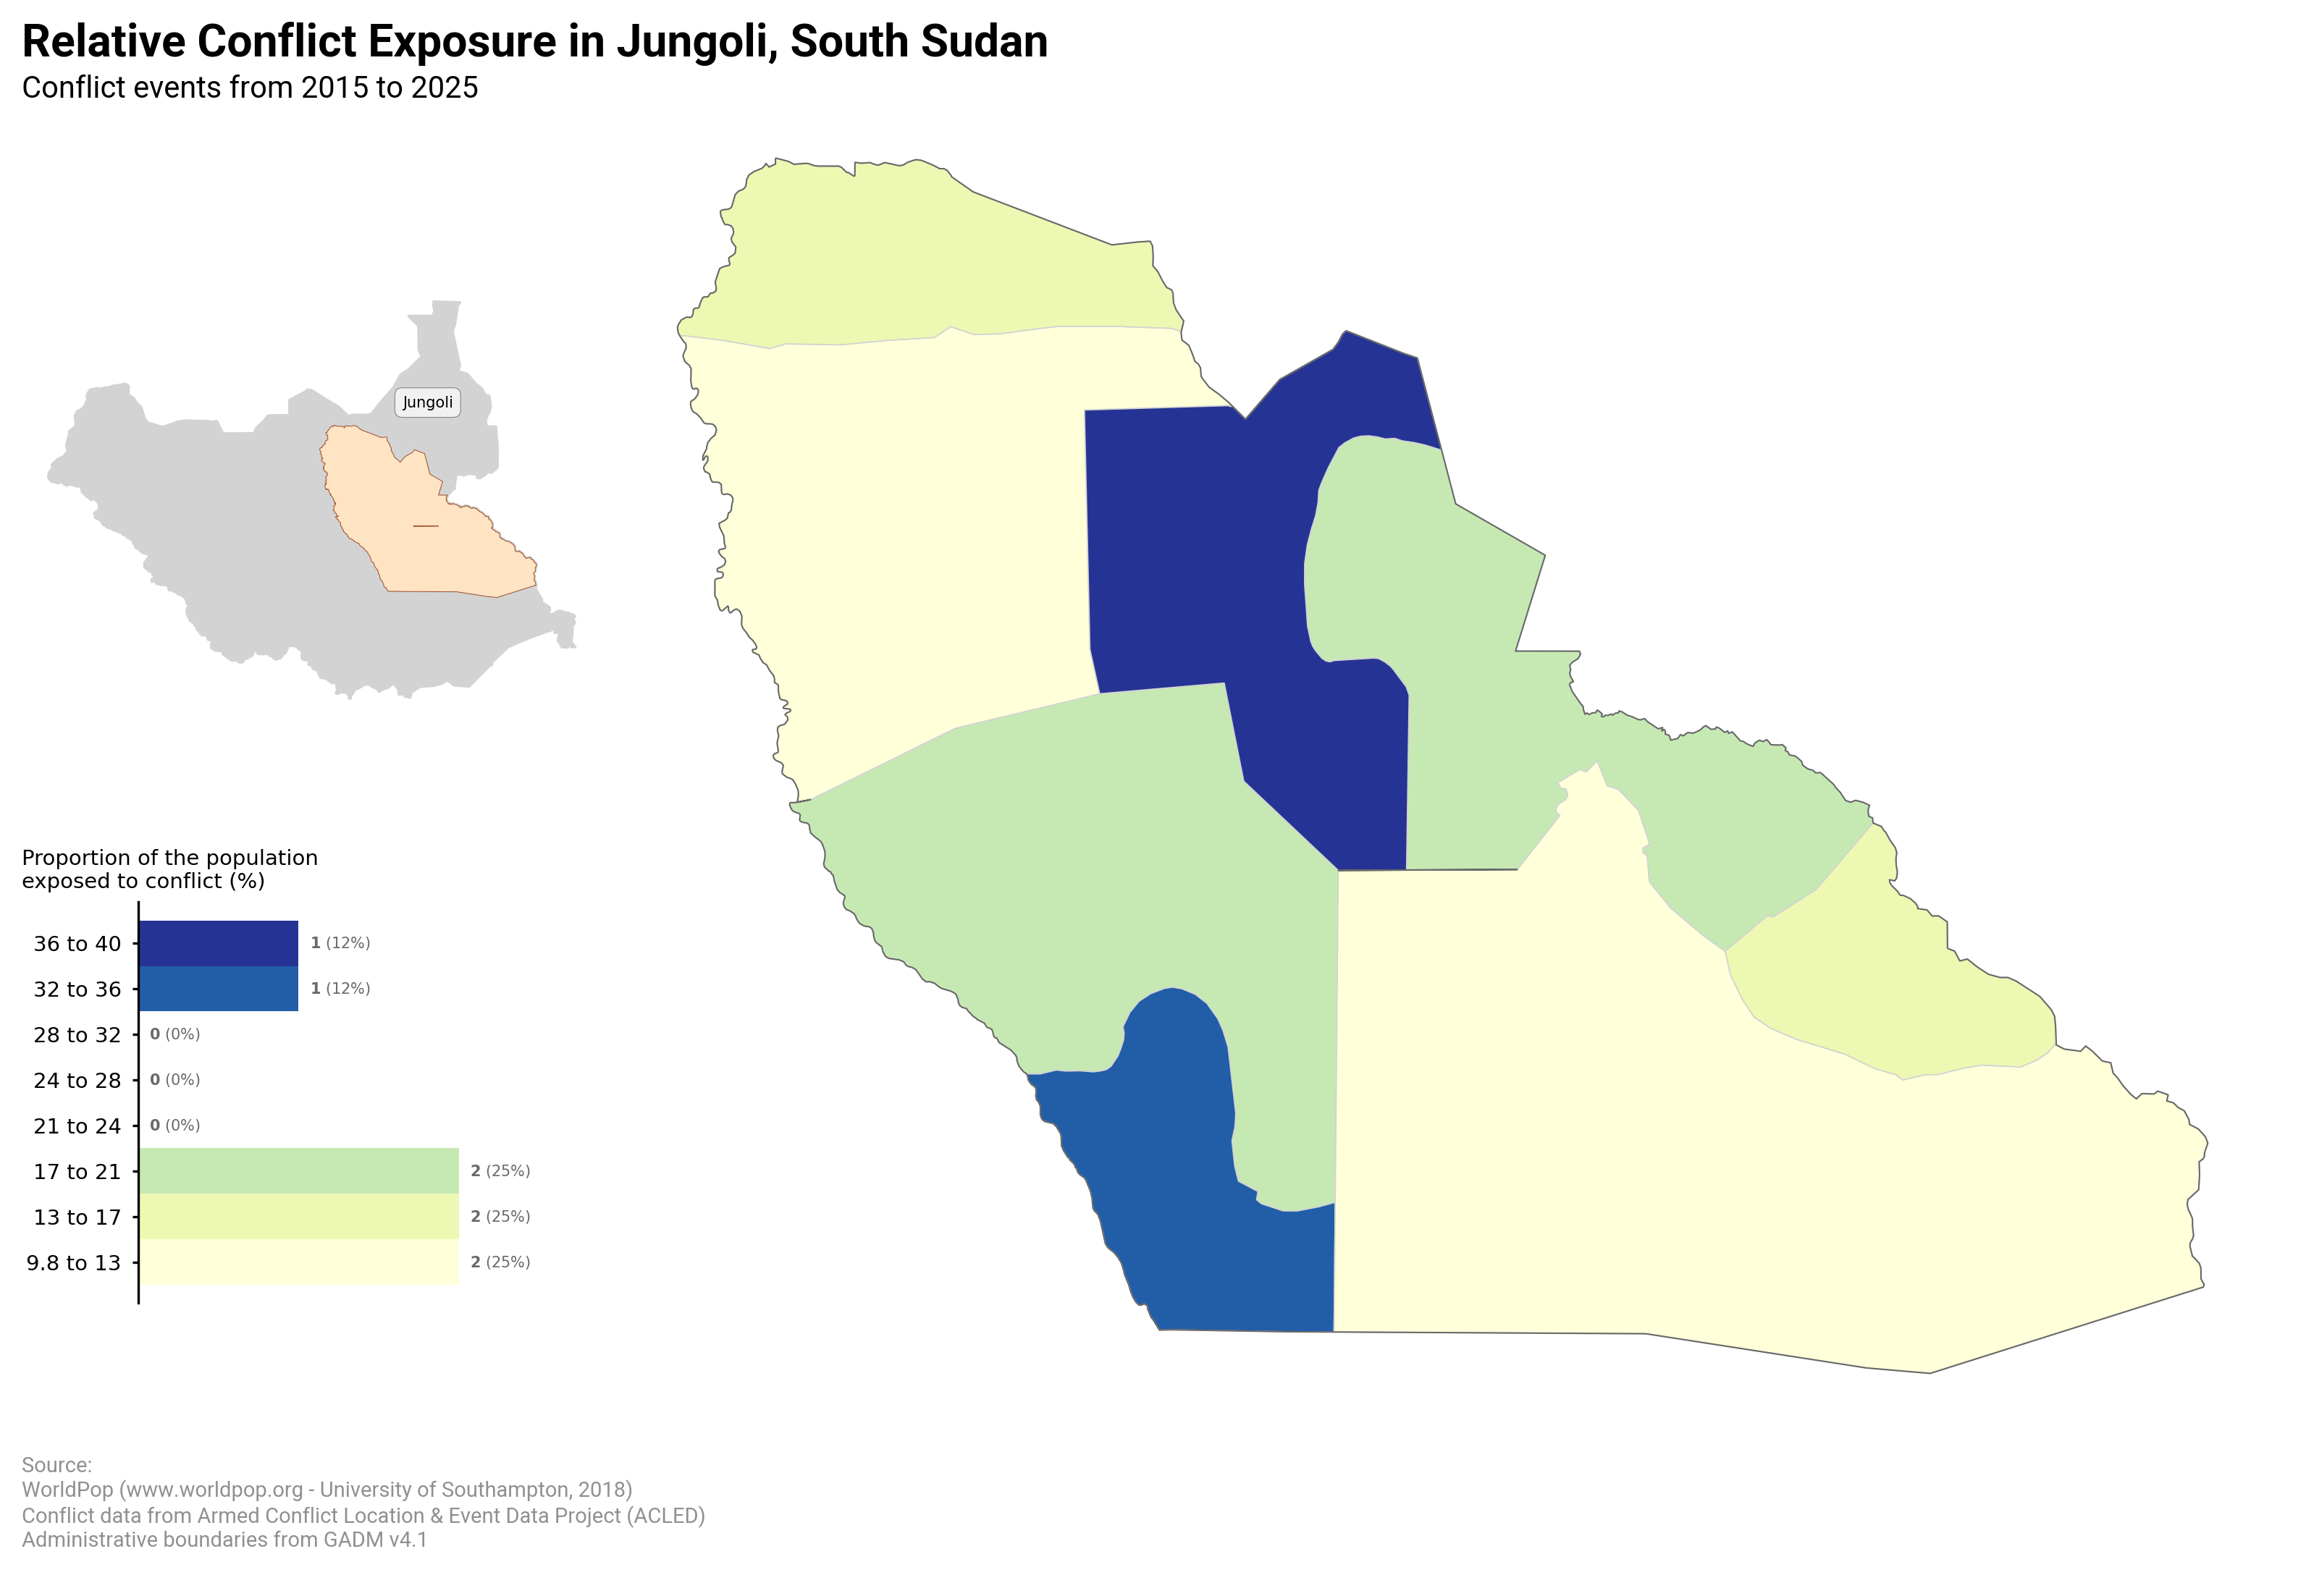

In [27]:
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (population_best)", "ACLED (WBG calculation)", "UCDP"]
exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
exposure = data_utils.get_exposure(dm, exposure)

adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Jungoli" # @param {type: "string"}

ax, x = geoplot.plot_choropleth(
    var=f"{source}_{exposure}",
    zoom_to={adm_level: adm_string},
    #var_bounds=[0, 100]
);

## Map Exposure to a Single Hazard

/usr/local/lib/python3.12/dist-packages/dfcv_colocation_mapping/map_utils.py:319: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(), fontsize=config["cbar_fontsize"])


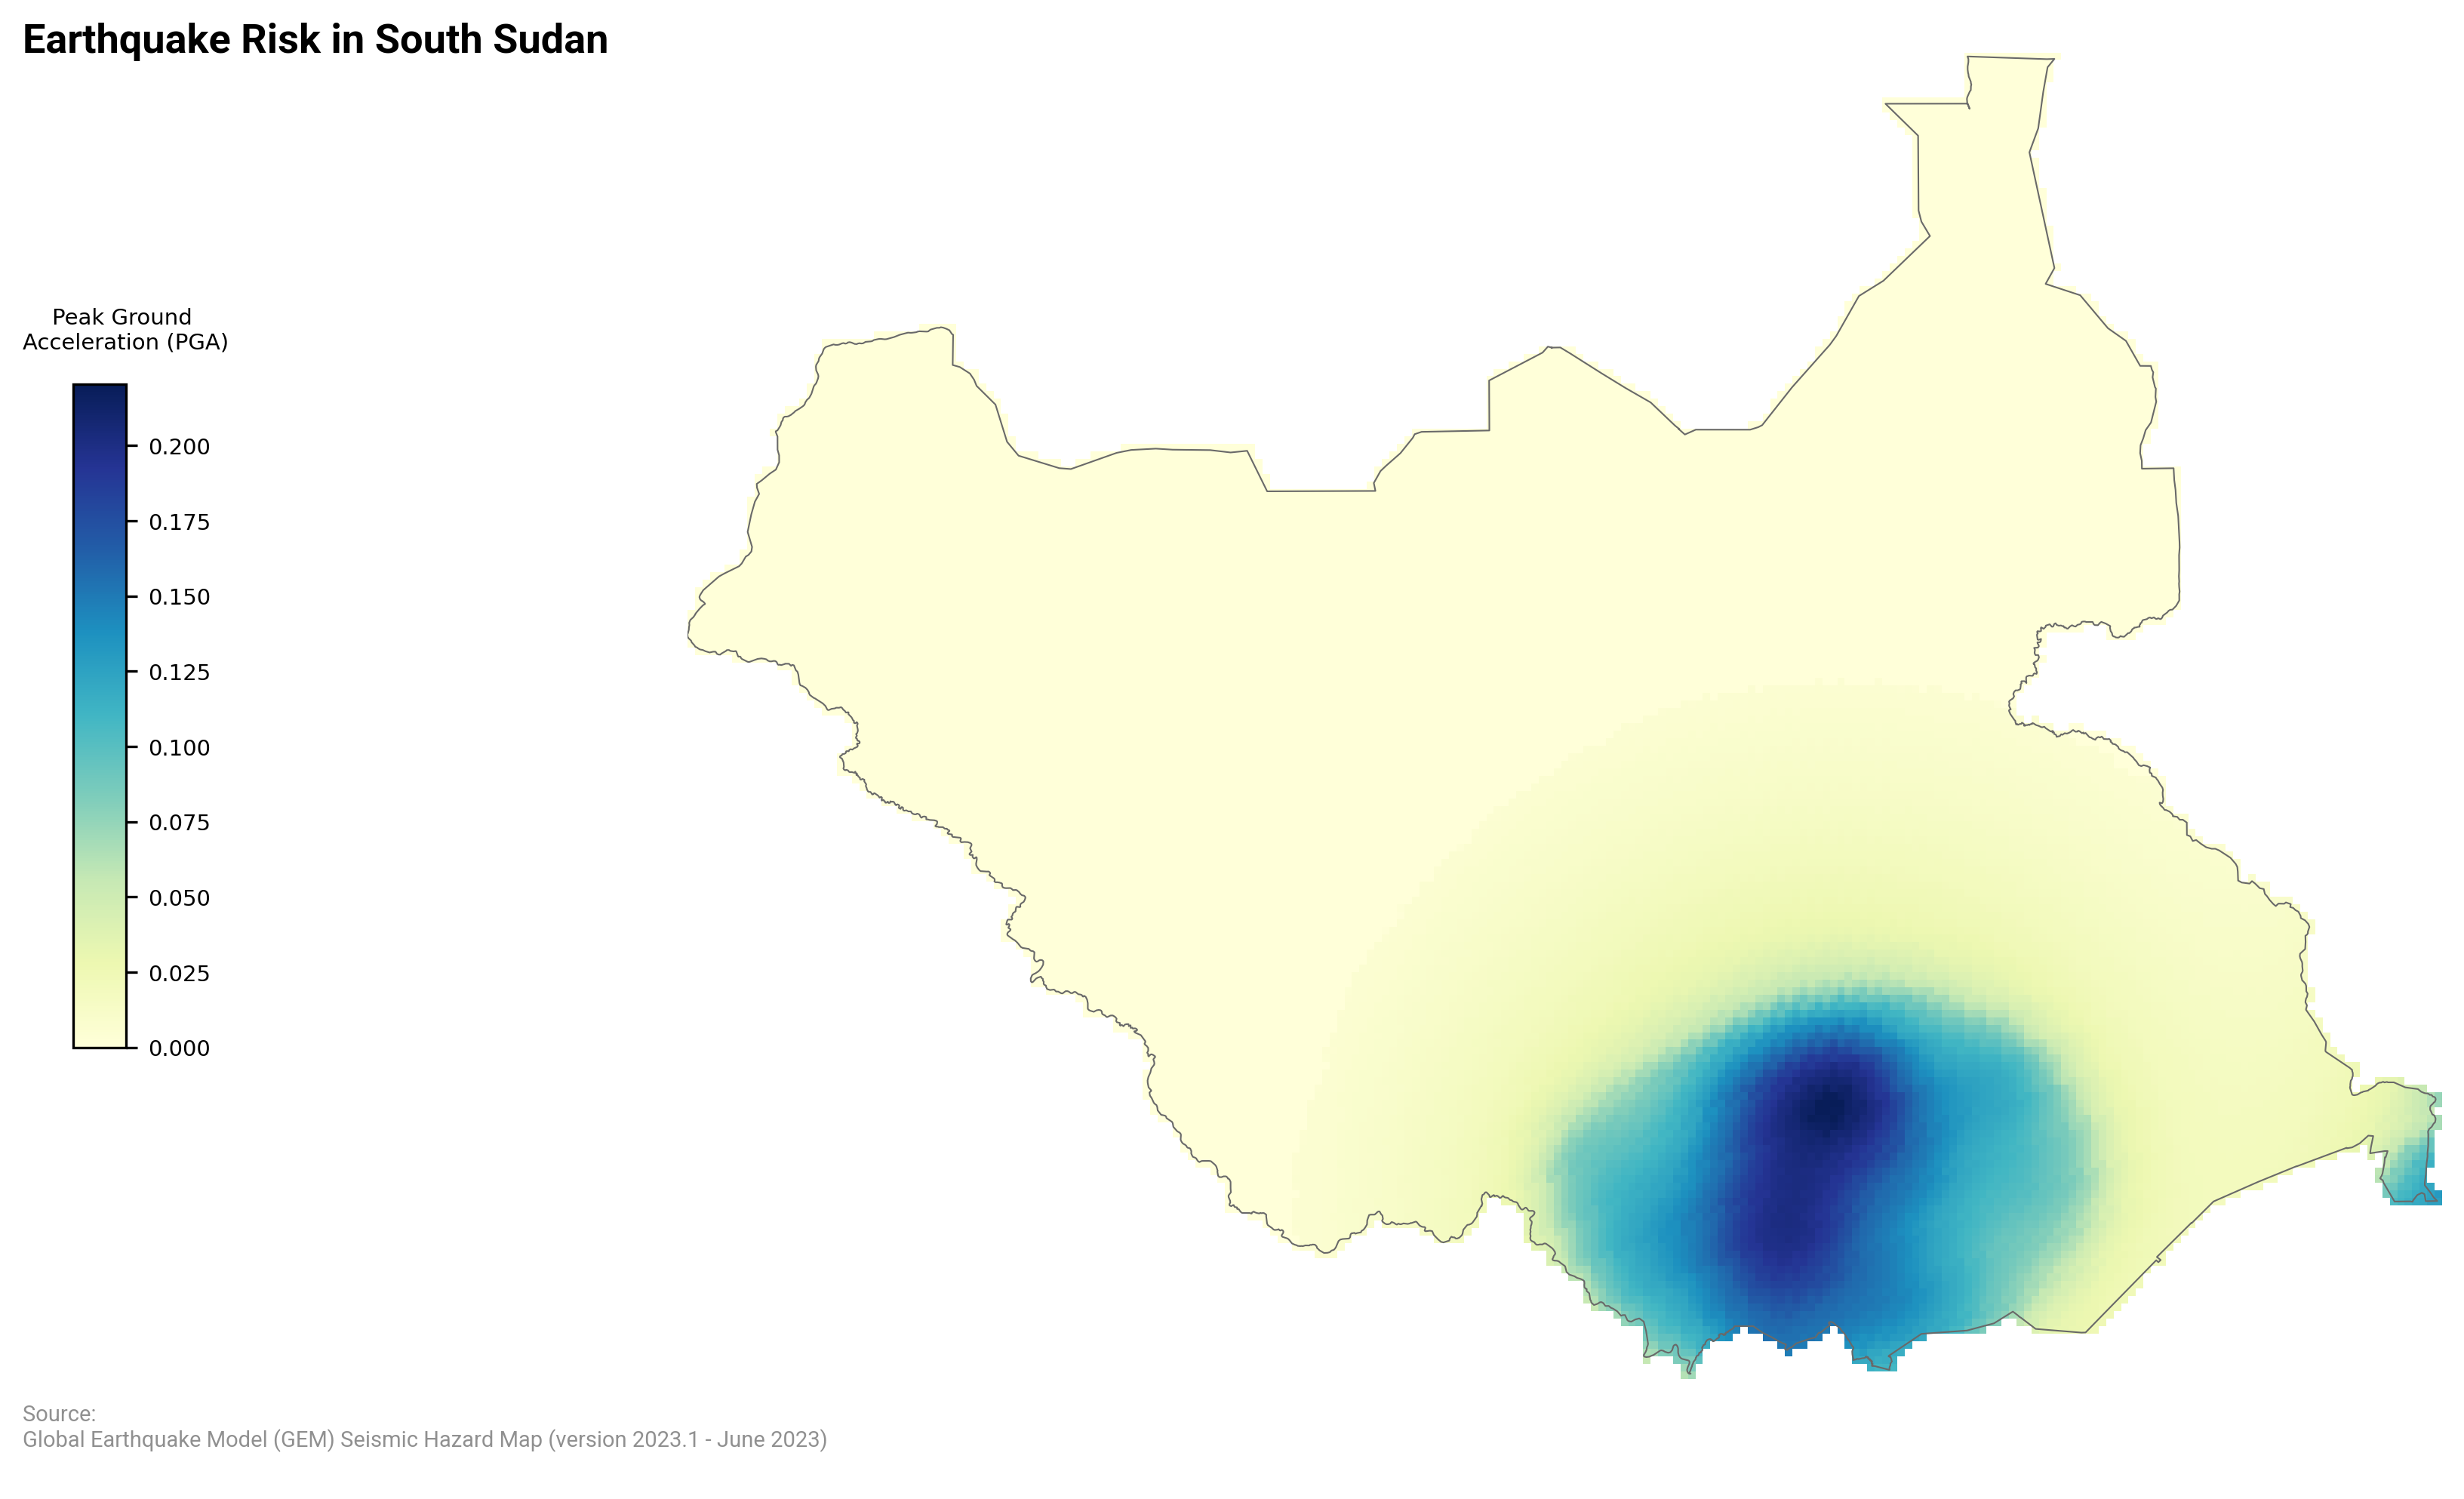

In [29]:
hazard = "earthquake" # @param ["earthquake", "landslide", "cyclone", "drought", "heat_stress", "fluvial_flood"]
ax = geoplot.plot_raster(hazard);

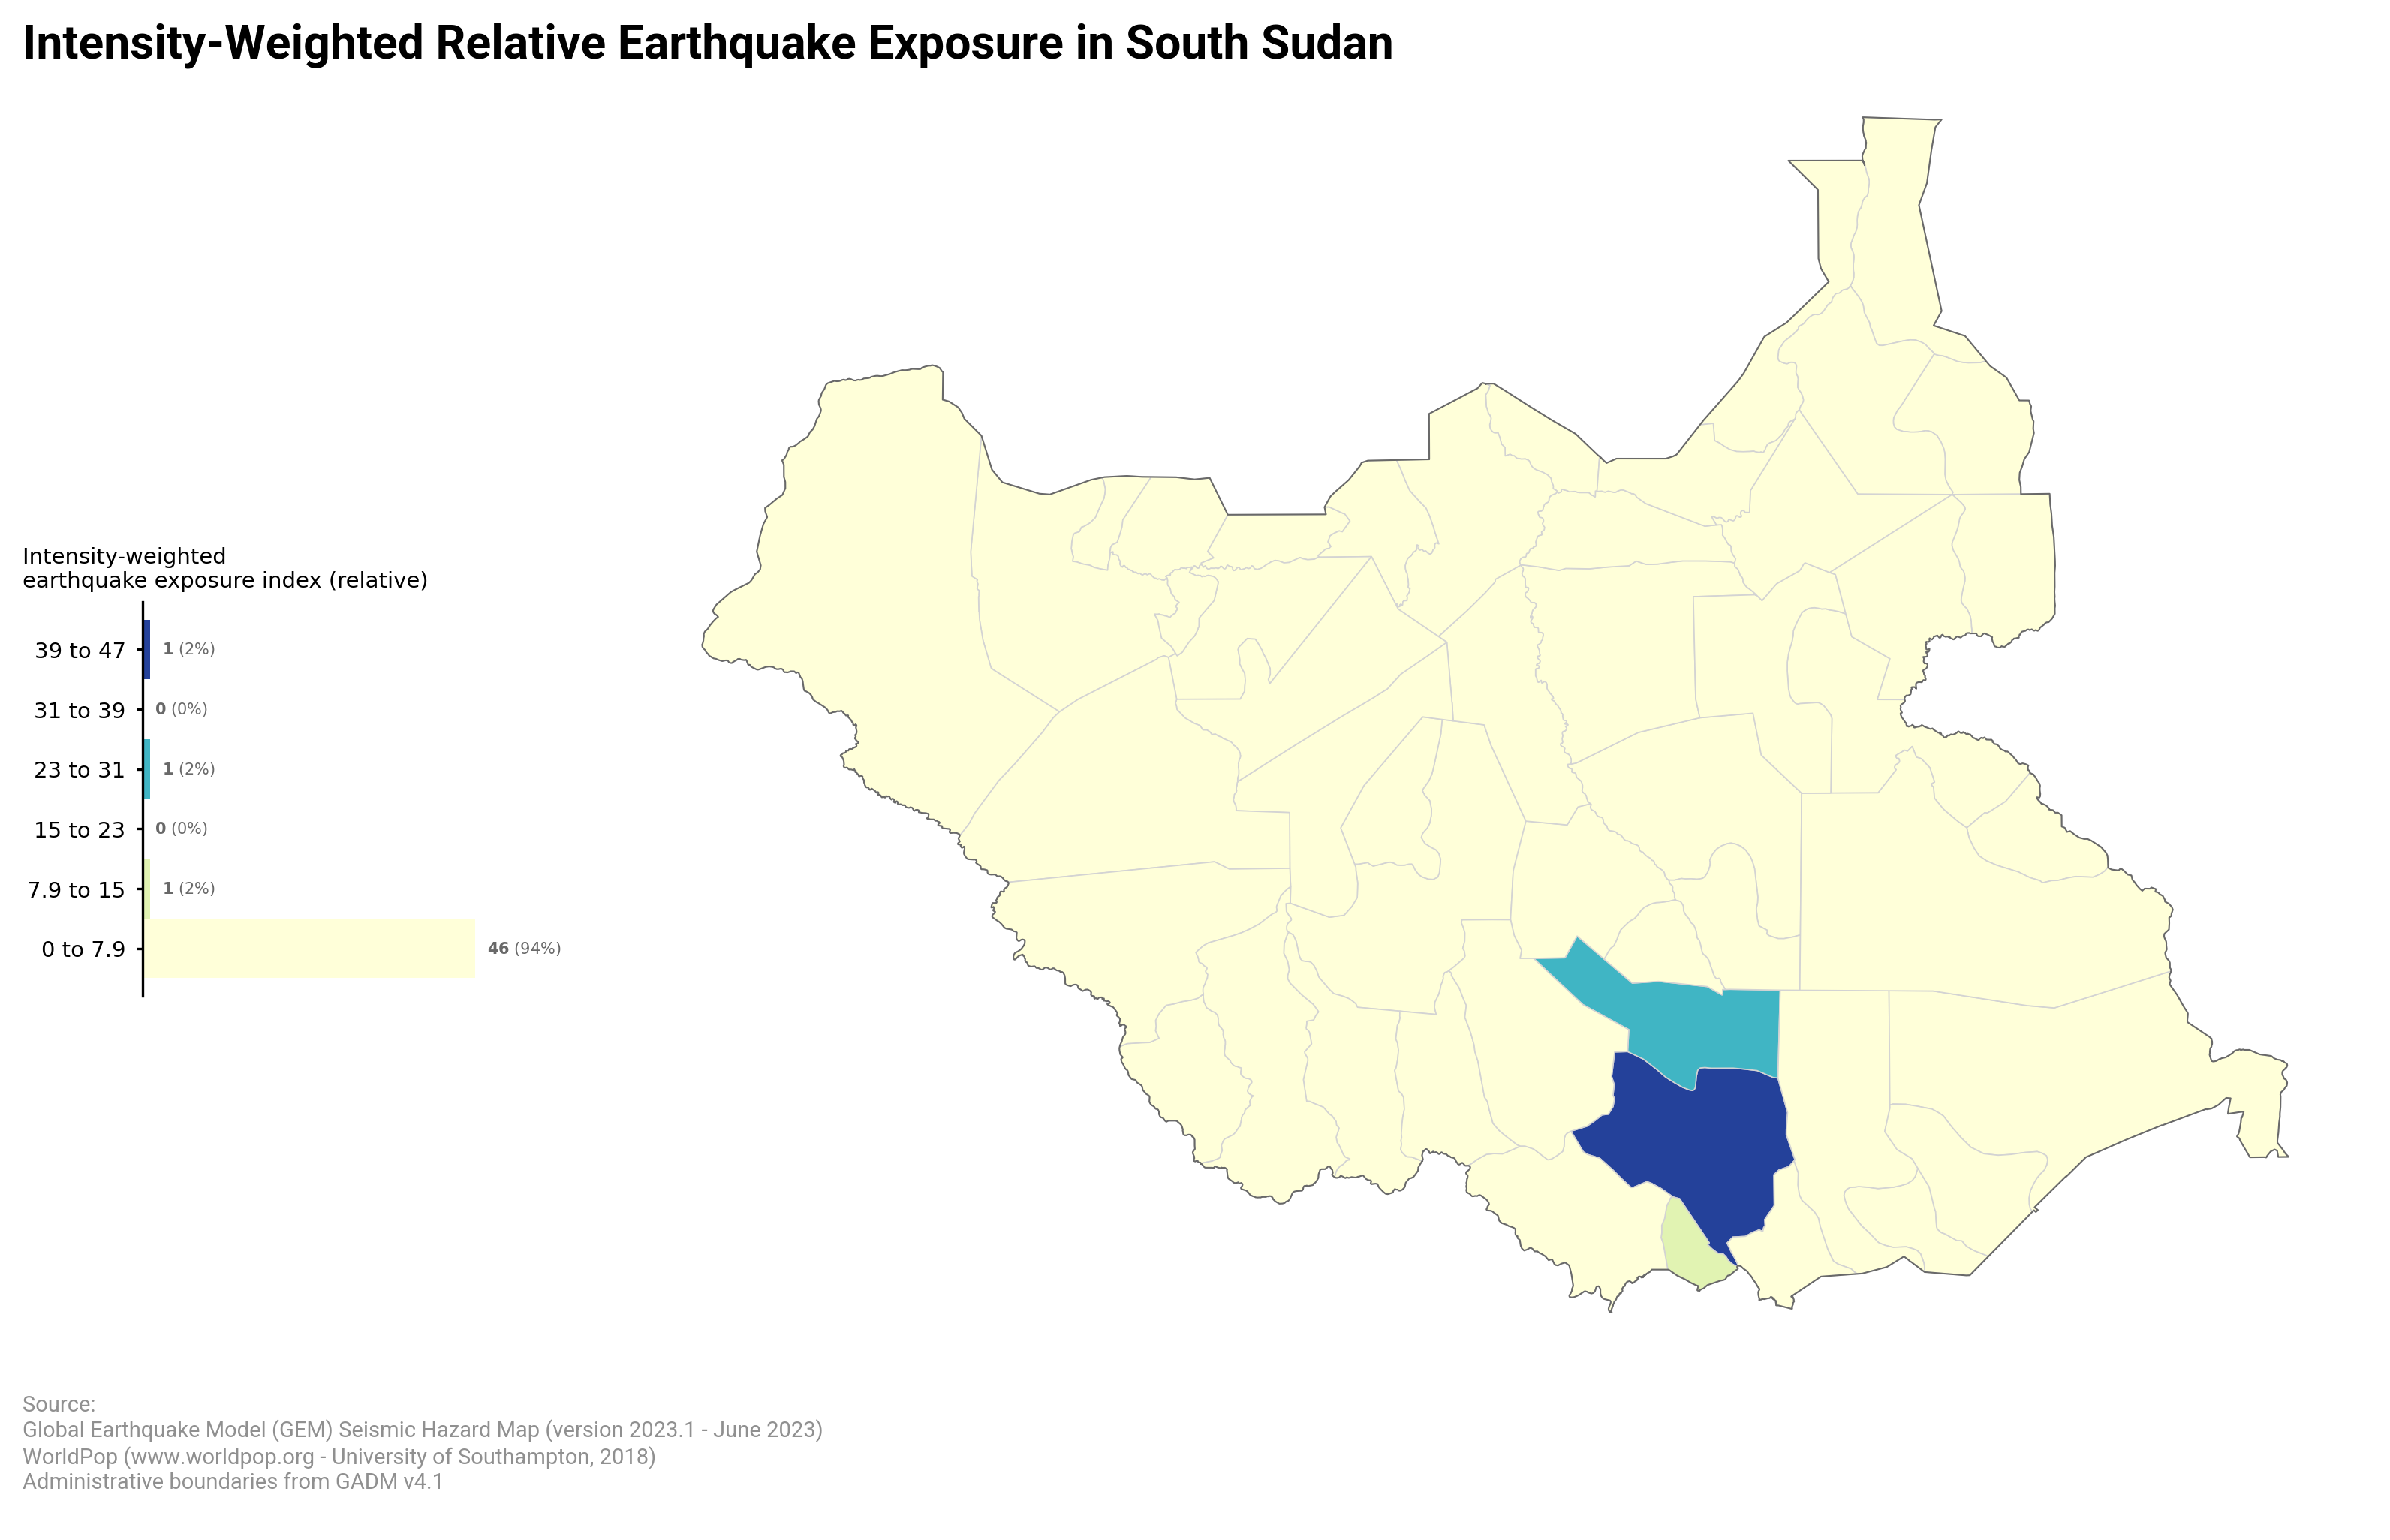

In [32]:
hazard = "earthquake" # @param ["earthquake", "landslide", "cyclone", "drought", "heat_stress", "fluvial_flood"]
exposure = "intensity_weighted_relative" # @param ["absolute", "relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, exposure)

ax, x = geoplot.plot_choropleth(
    f"{hazard}_{dm.asset}_{exposure}",
    #kwargs={"legend_type": "colorbar"}
);

## Multi-hazard Exposure Index

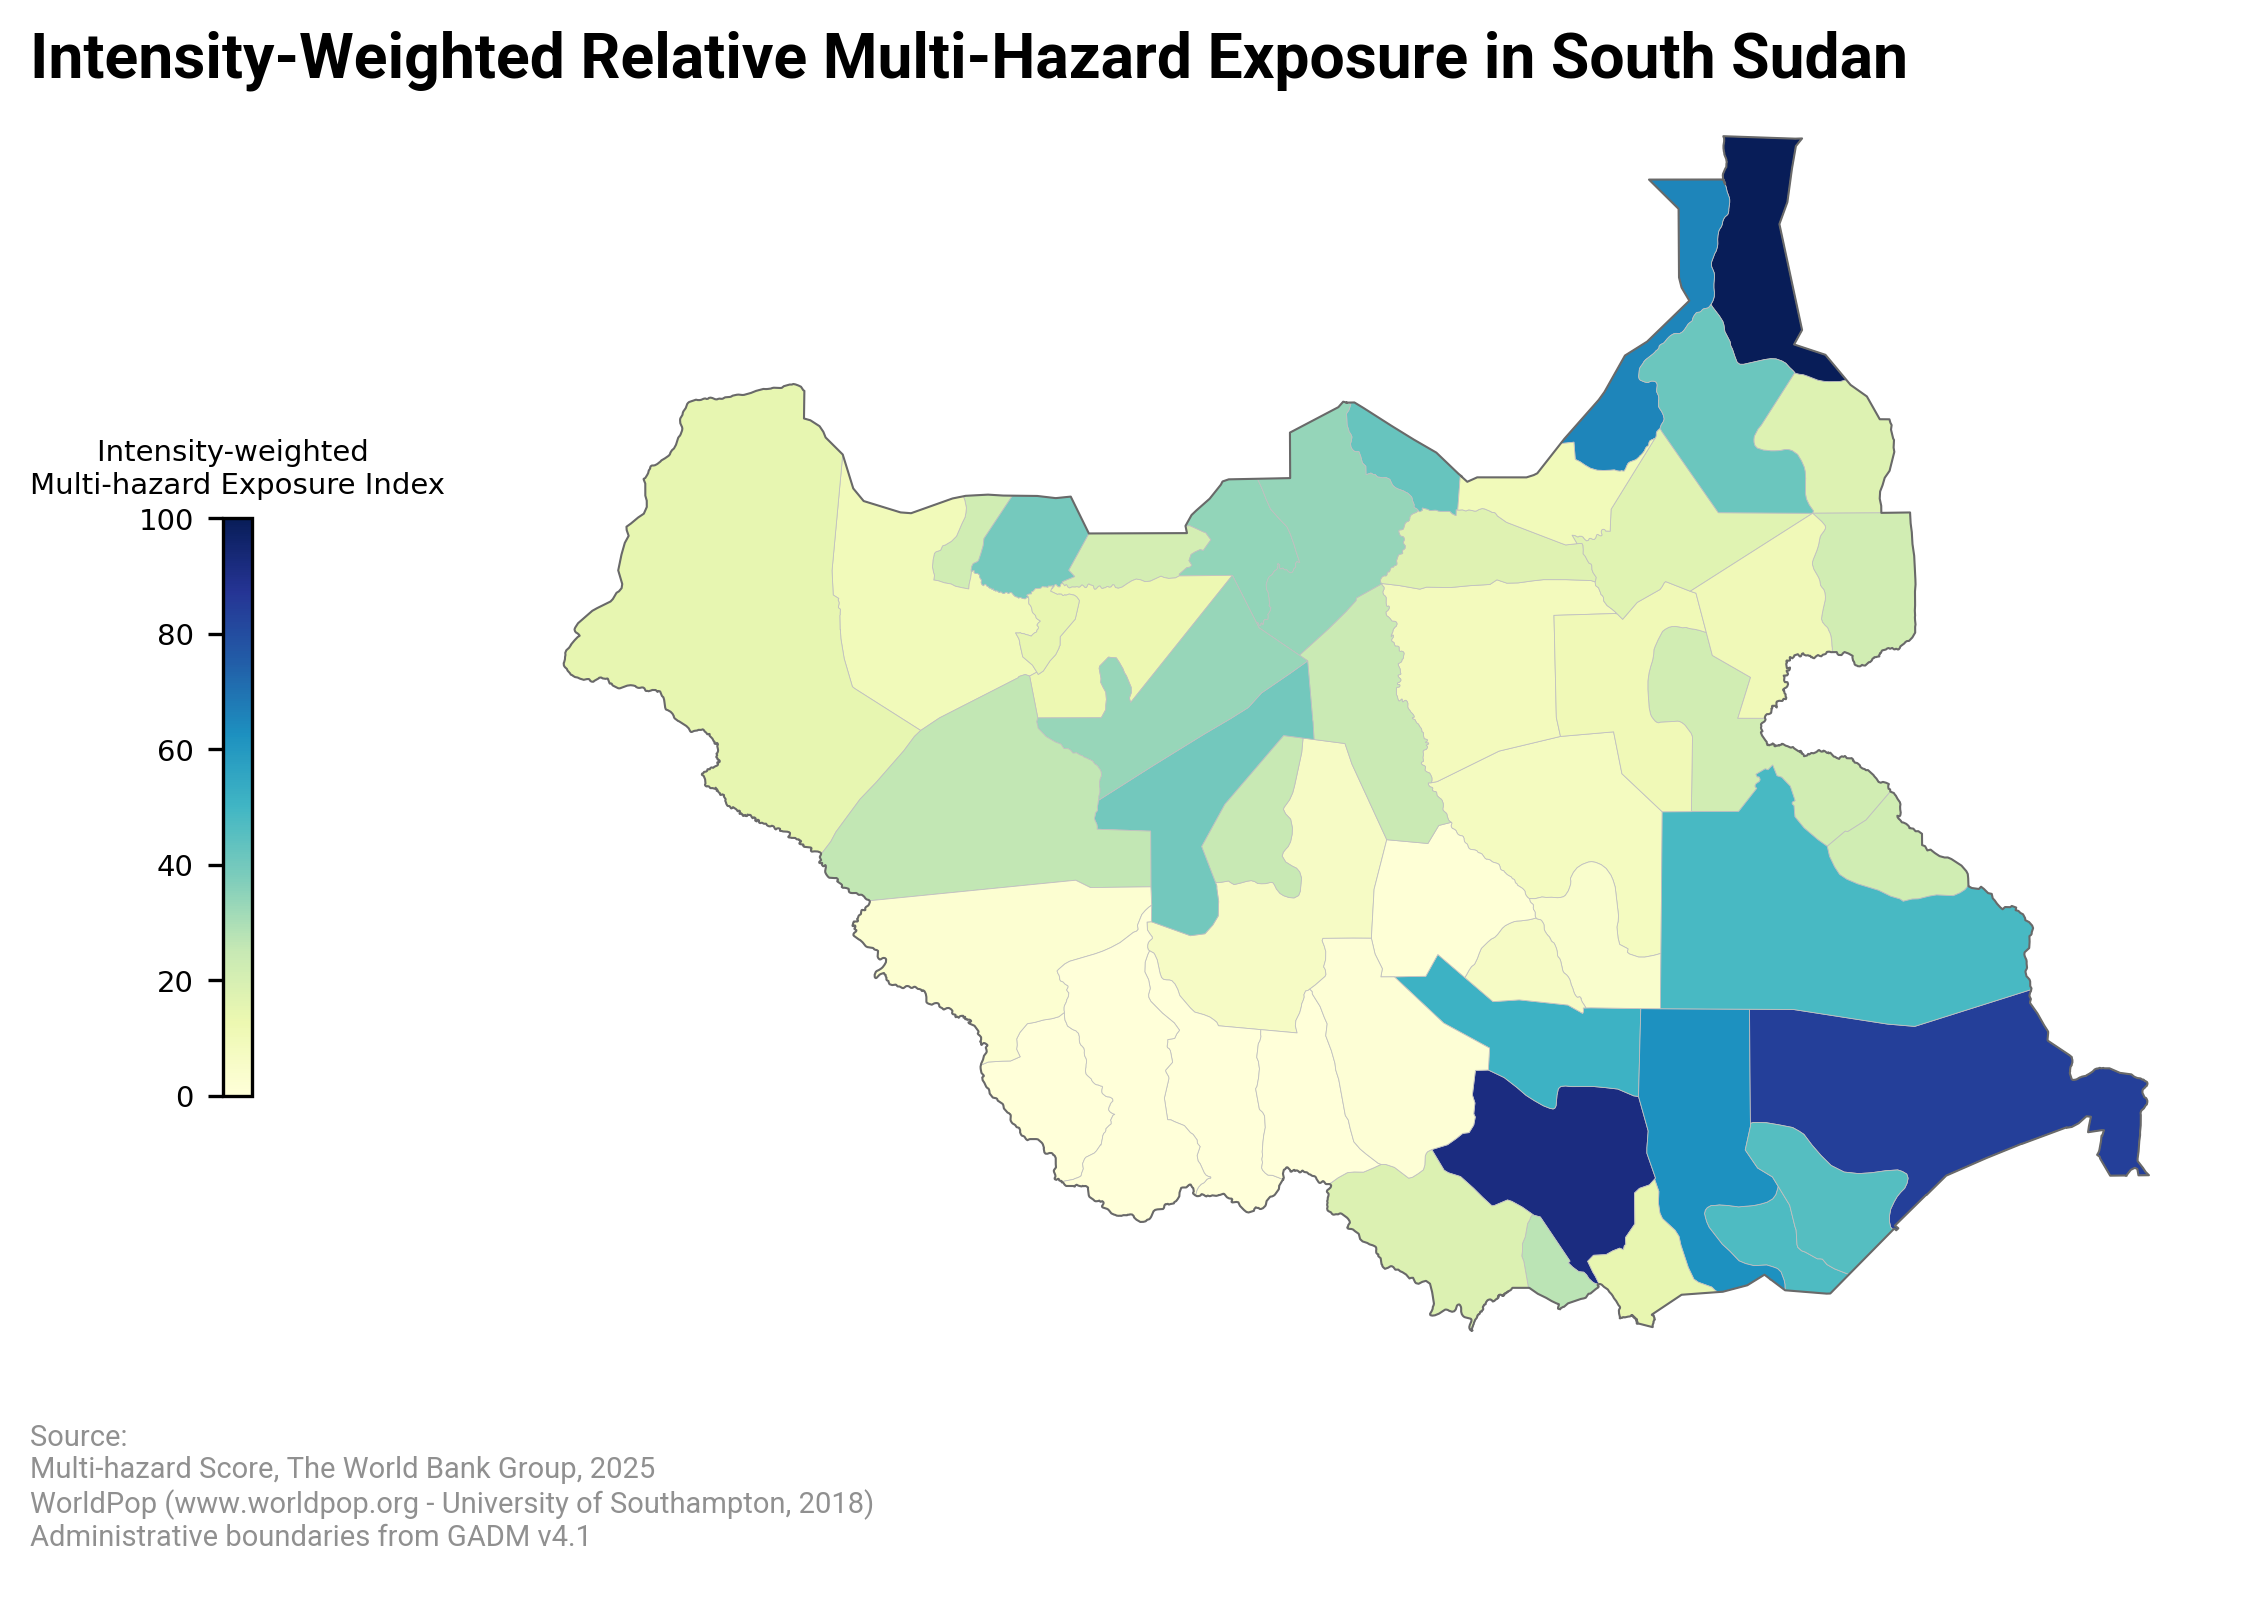

In [33]:
exposure = "intensity_weighted_relative" # @param ["relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, exposure)

ax, x = geoplot.plot_choropleth(
    var=f"mhs_{dm.asset}_{exposure}",
    kwargs={
        "legend_type": "colorbar",
        "edgecolor": "silver",
        "linewidth": 0.2
    }
);

## Generating Multi-hazard Conflict Exposure Choropleth Maps

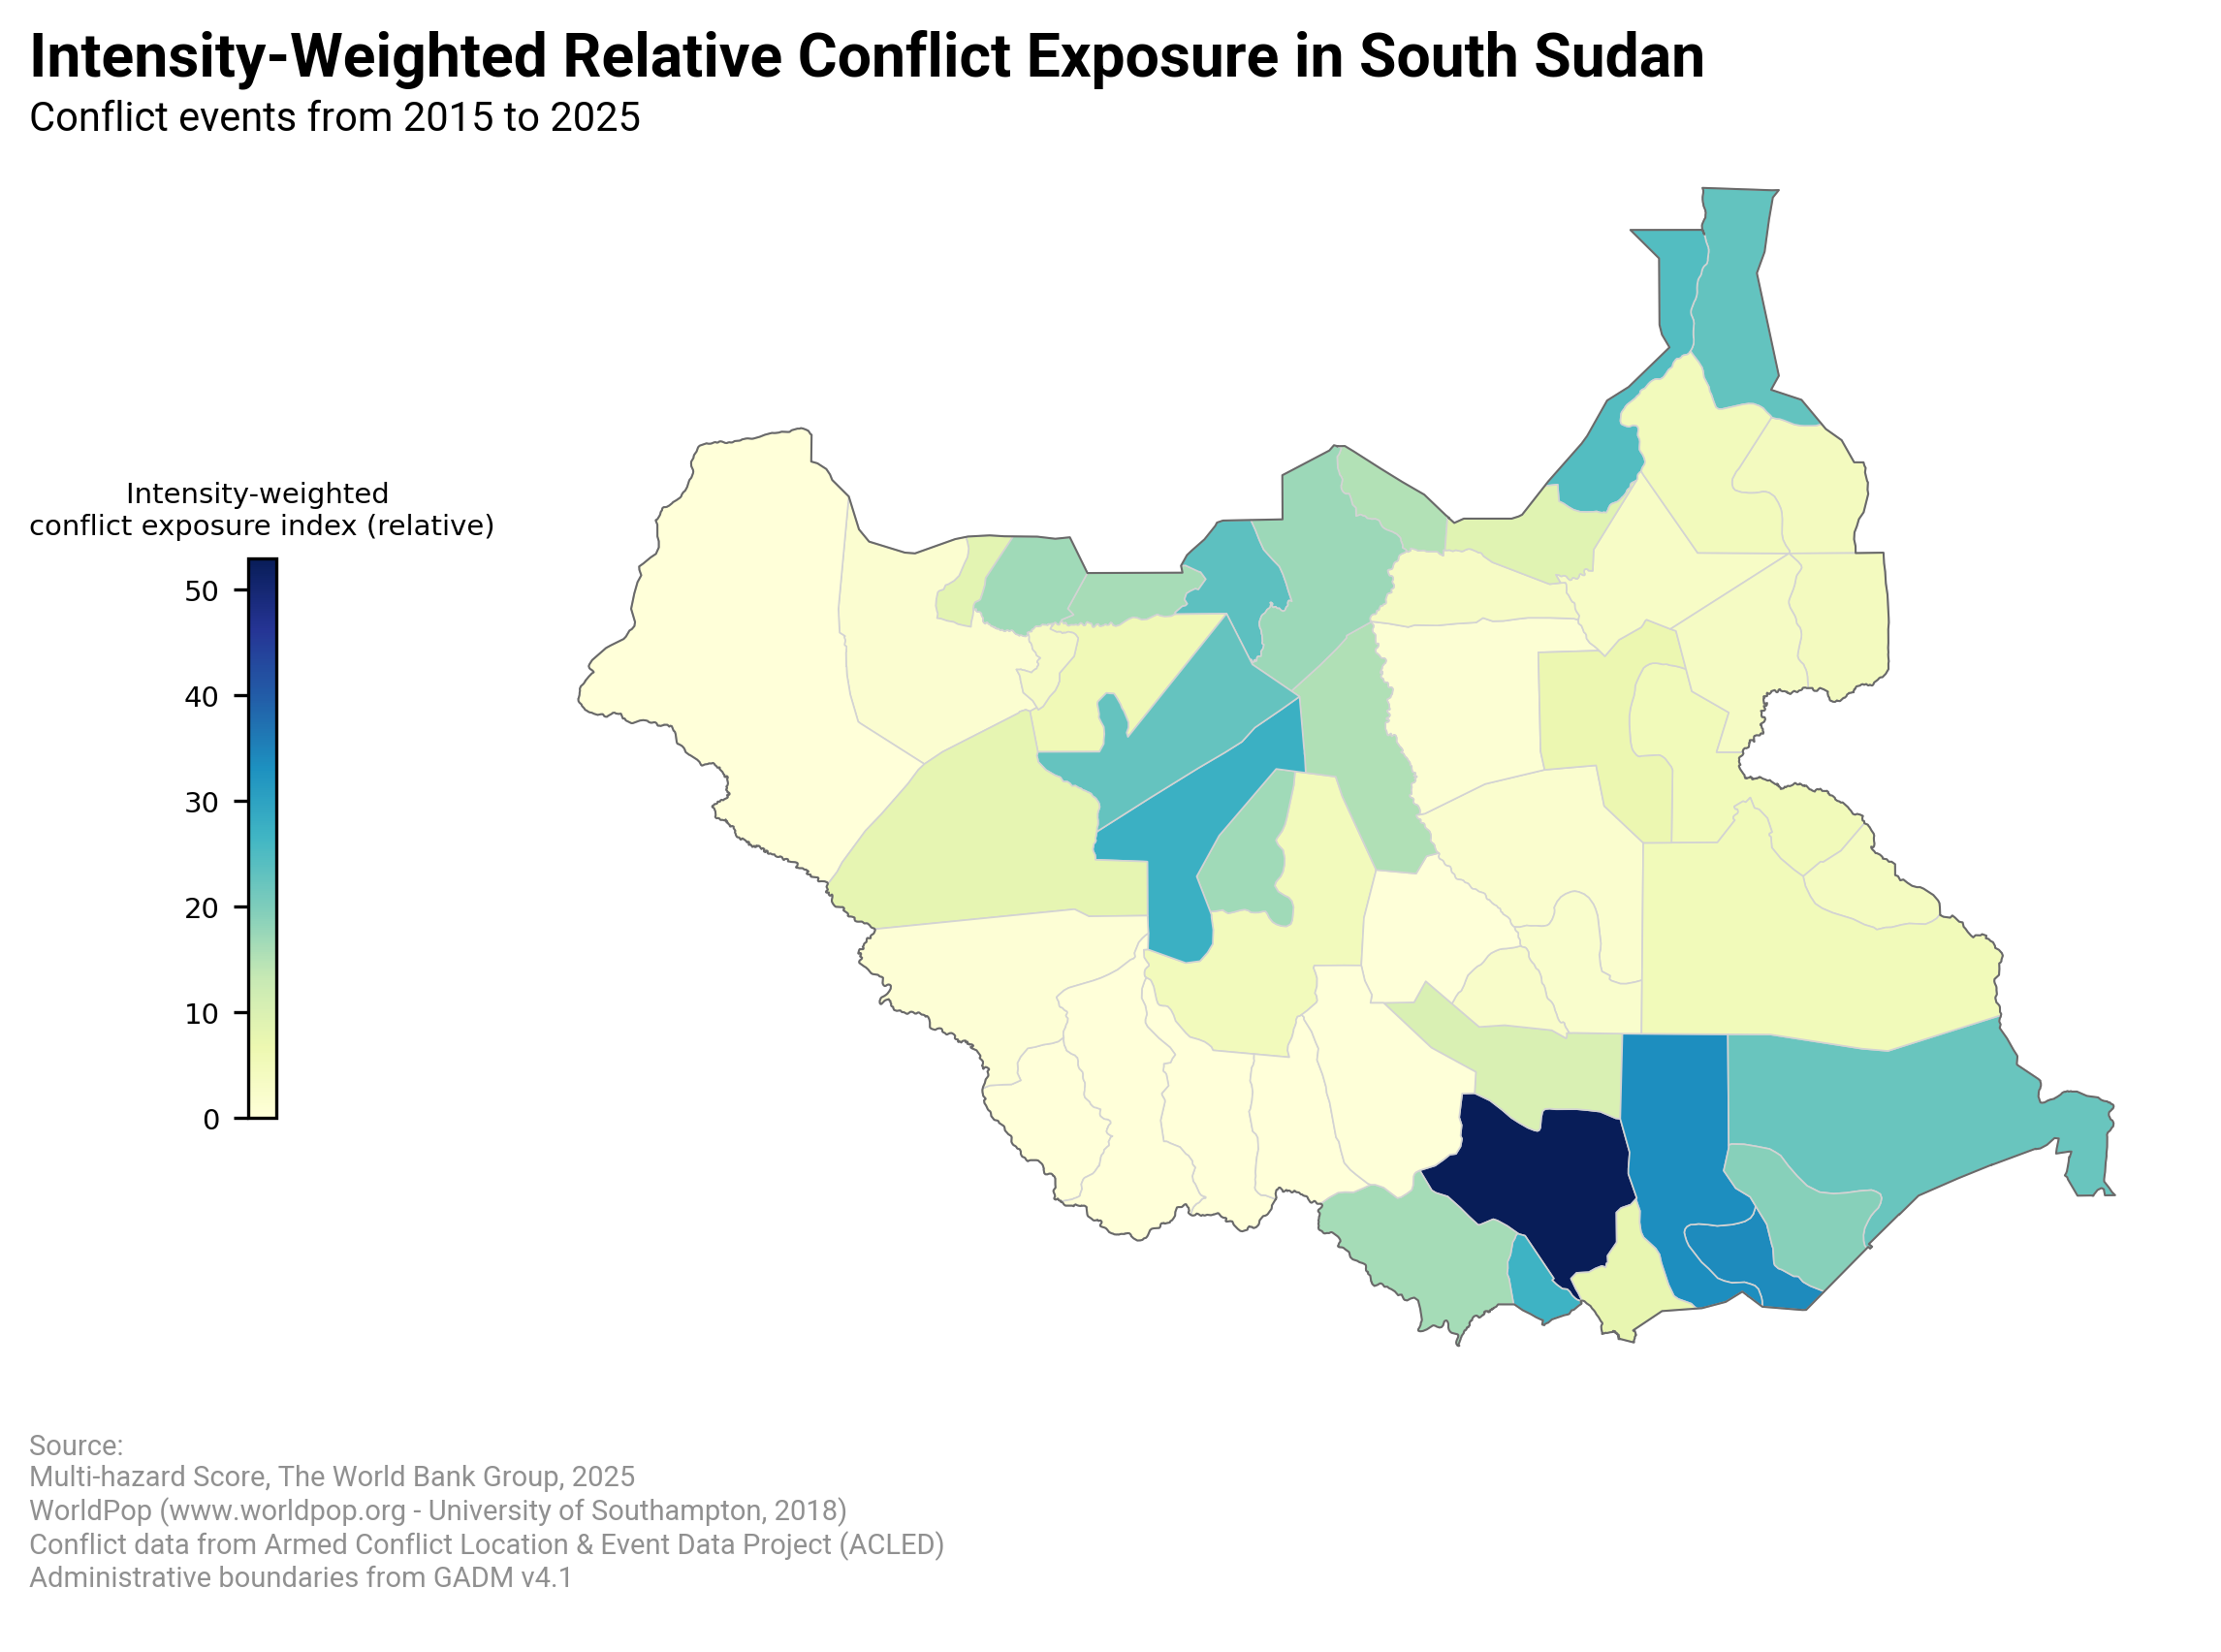

In [34]:
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (WBG calculation)", "UCDP"]
source = data_utils.get_conflict_source(dm, conflict_exposure_source)

mhs_exposure = "intensity_weighted_relative" # @param ["relative", "intensity_weighted_relative"]
exposure = data_utils.get_exposure(dm, mhs_exposure)

ax, x = geoplot.plot_choropleth(
    var=f"mhs_{source}_{exposure}",
    kwargs={"legend_type": "colorbar"}
);

## Generating Multi-hazard Conflict Exposure Bi-variate Choropleth Maps

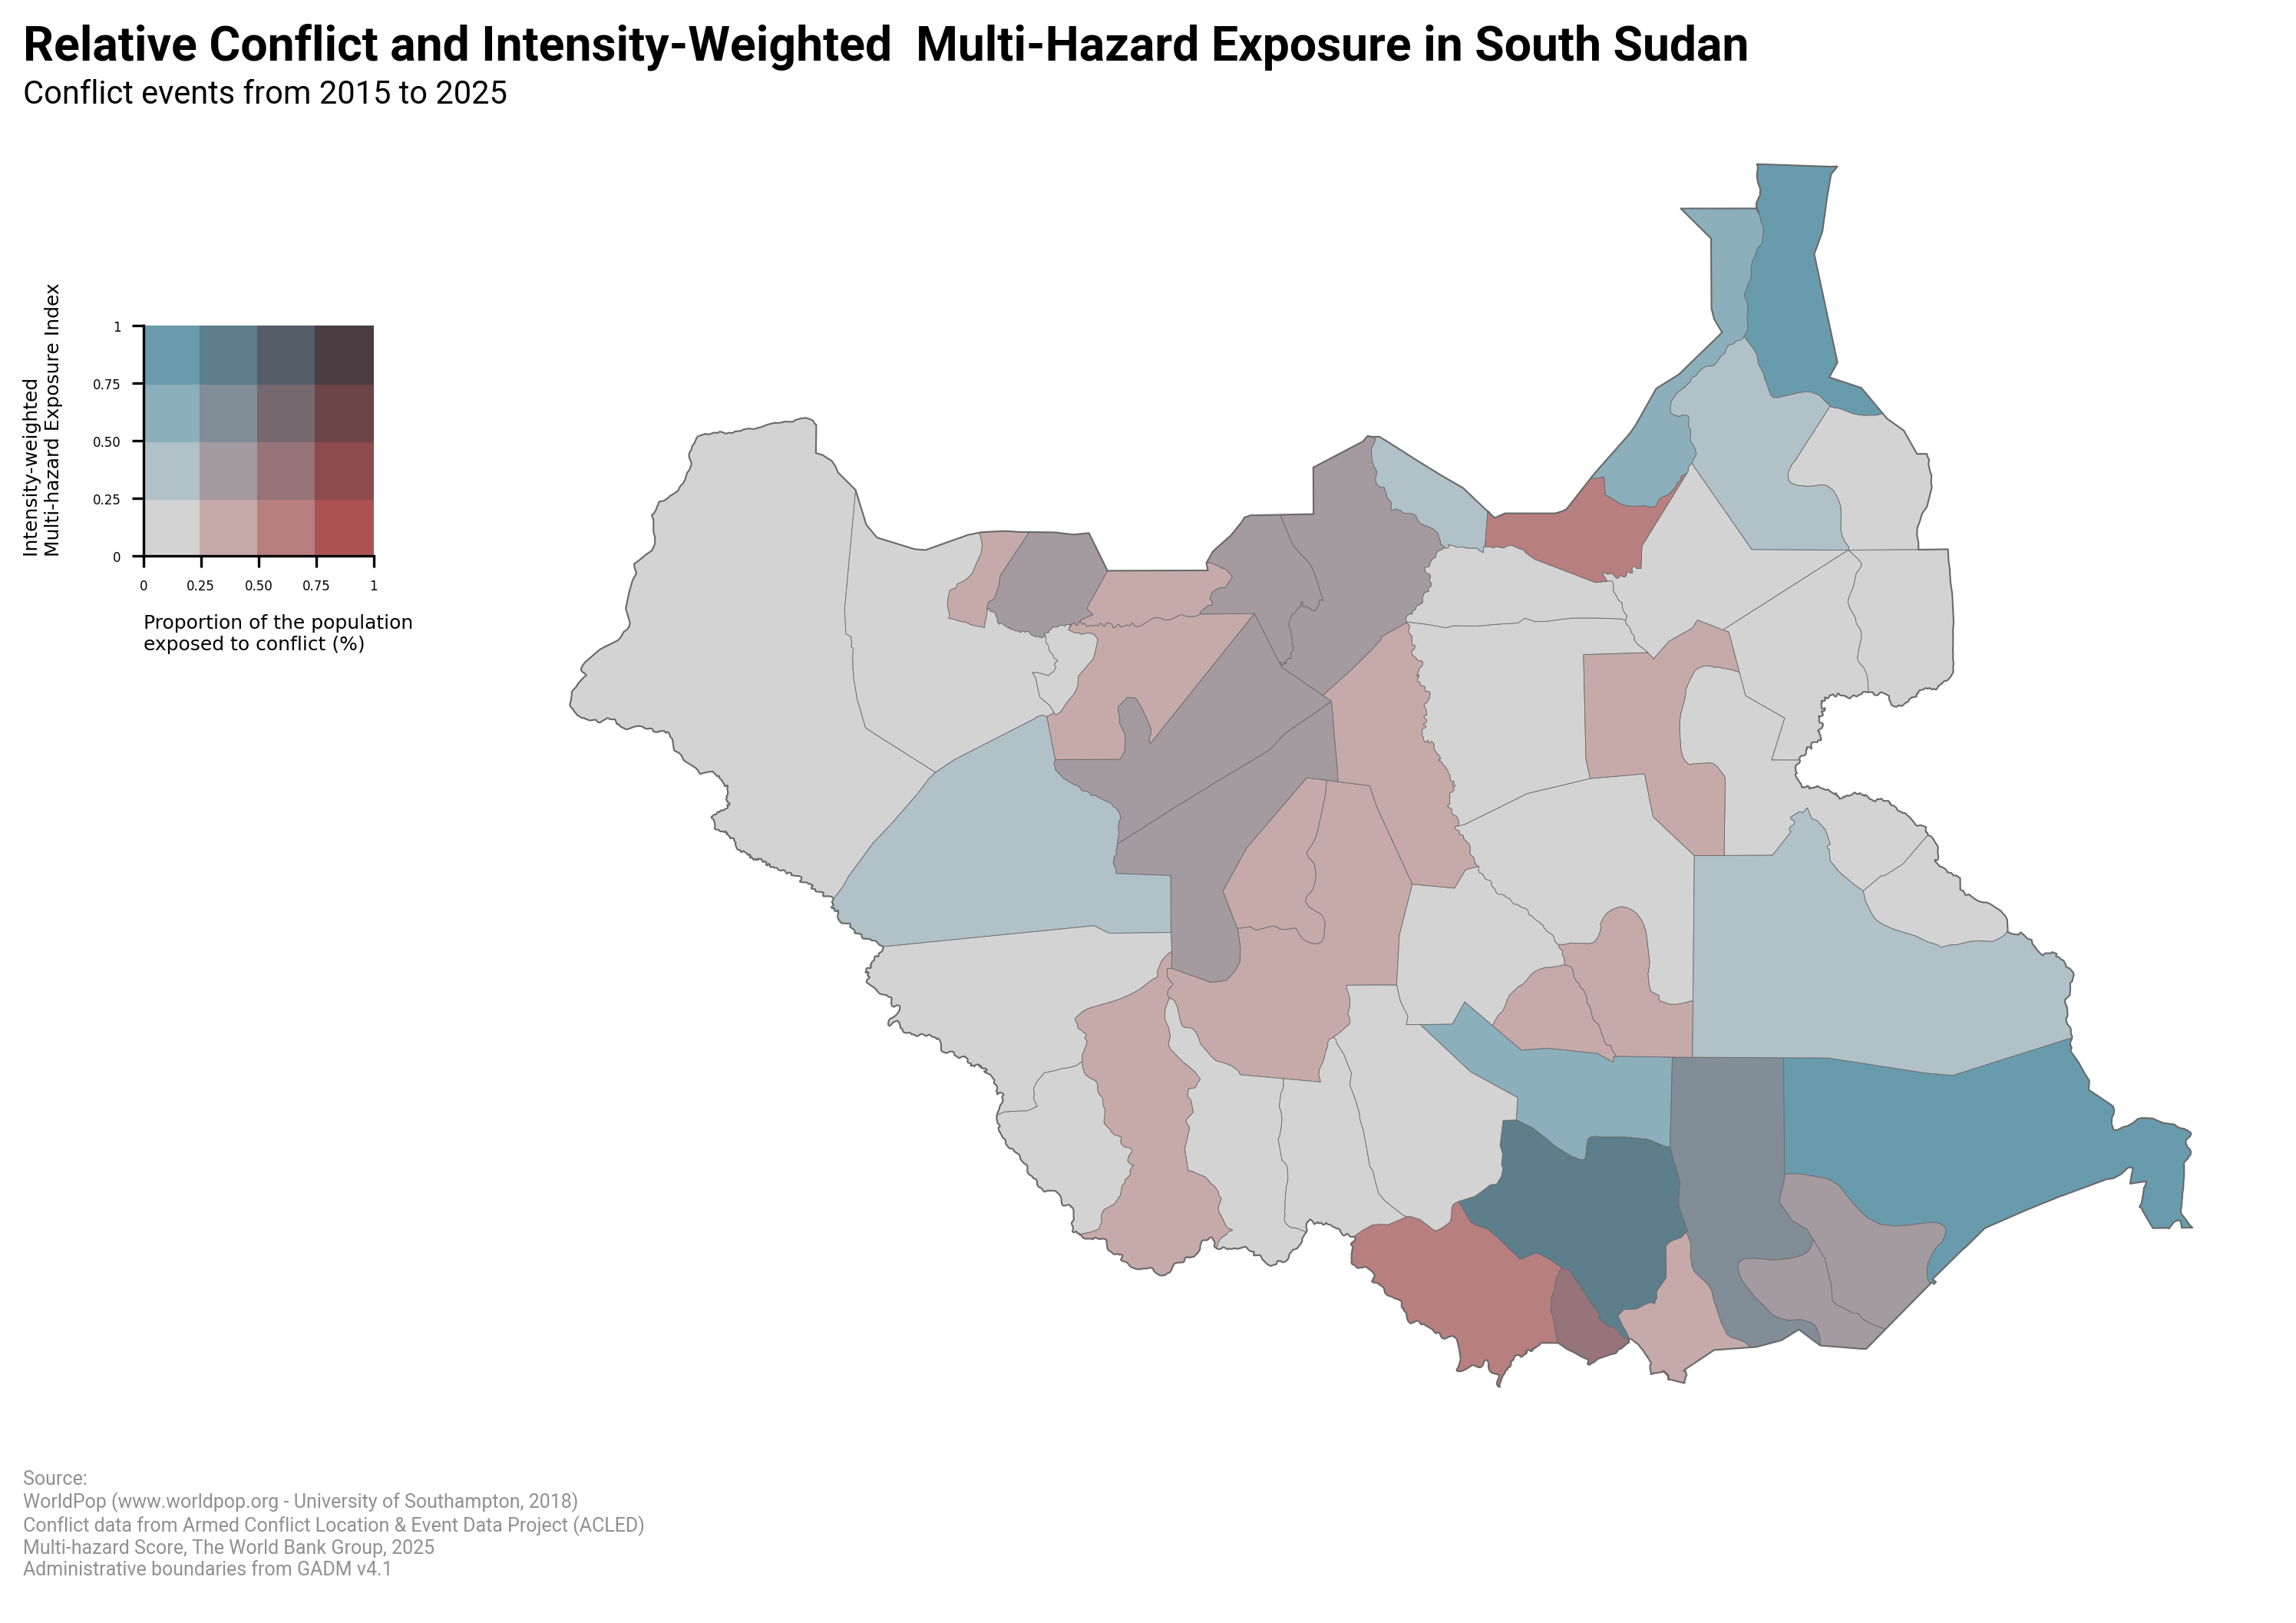

In [35]:
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (WBG calculation)", "UCDP"]
conflict_exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
conflict_exposure = data_utils.get_exposure(dm, conflict_exposure)

mhs_exposure = "intensity_weighted_relative" # @param ["relative", "intensity_weighted_relative"]
mhs_exposure = data_utils.get_exposure(dm, mhs_exposure)

ax, x = geoplot.plot_bivariate_choropleth(
    var1=f"{source}_{conflict_exposure}",
    var2=f"mhs_{dm.asset}_{mhs_exposure}",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4,
        "edgecolor": "dimgray",
        "linewidth": 0.2
    }
);

### Zoom bivariate choropleth to a specific region

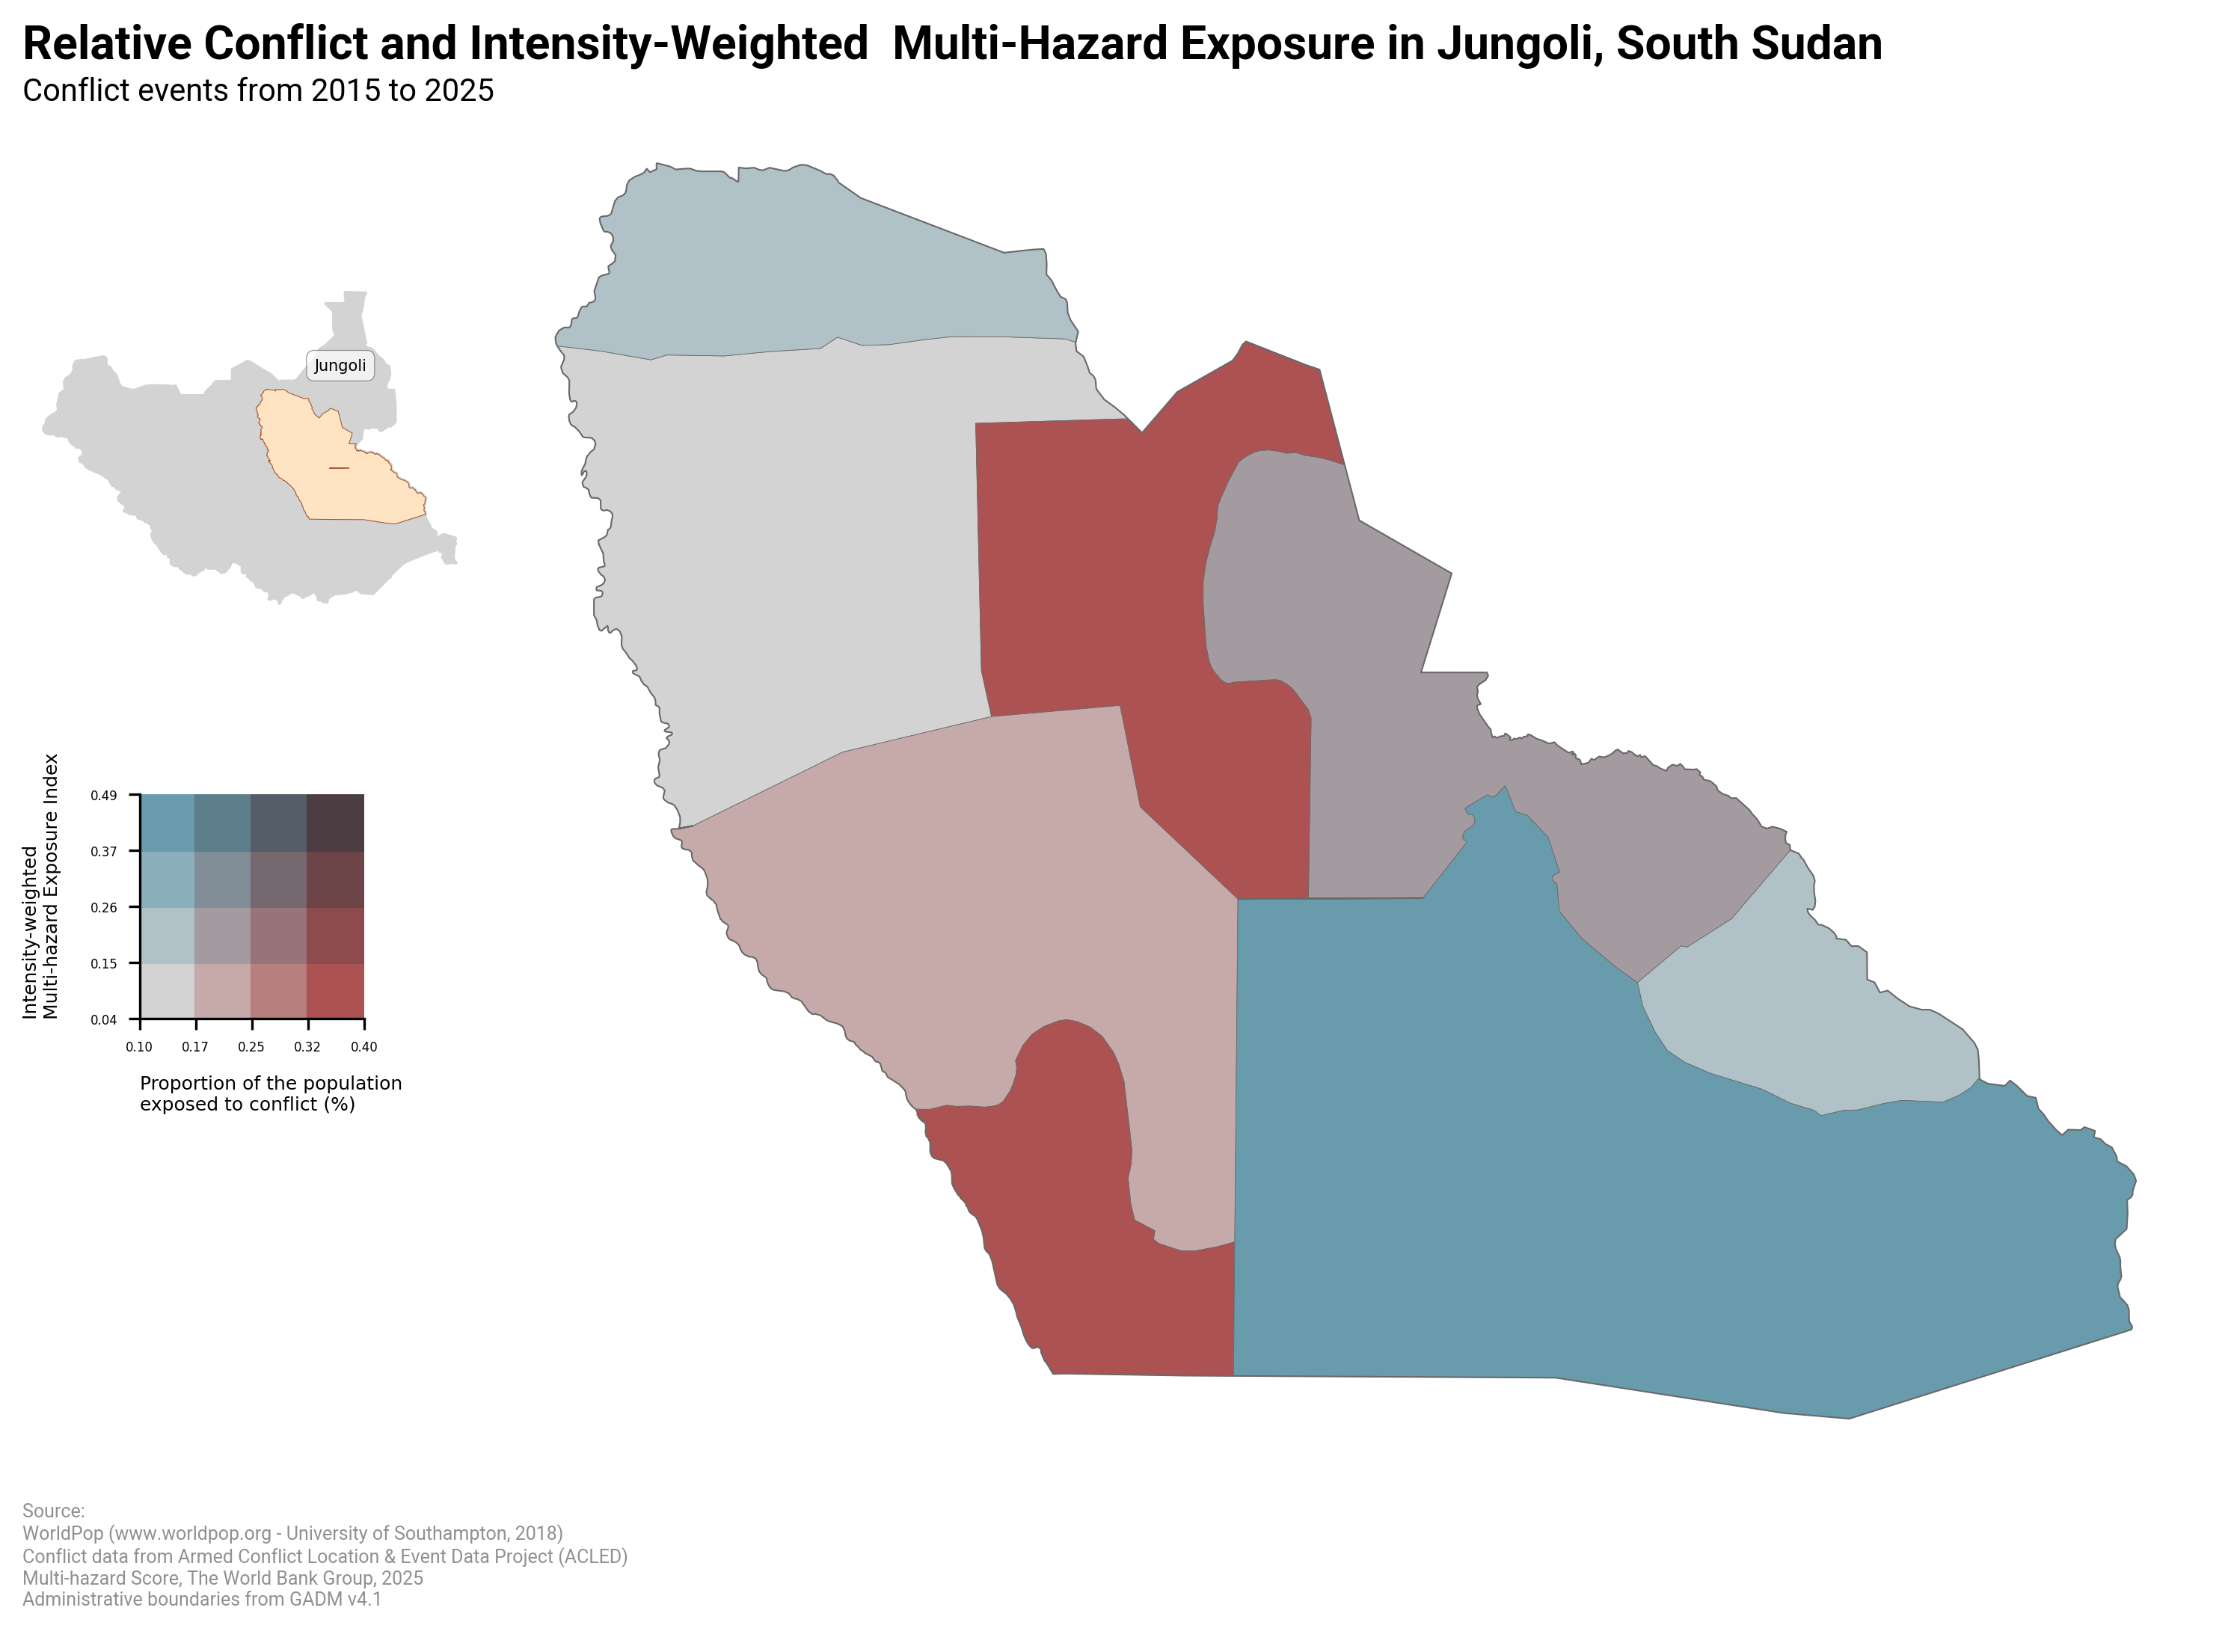

In [36]:
conflict_exposure_source = "ACLED (WBG calculation)" # @param ["ACLED (WBG calculation)", "UCDP"]
conflict_exposure = "relative" # @param ["absolute", "relative"]

source = data_utils.get_conflict_source(dm, conflict_exposure_source)
conflict_exposure = data_utils.get_exposure(dm, conflict_exposure)

mhs_exposure = "intensity_weighted_relative" # @param ["relative", "intensity_weighted_relative"]
mhs_exposure = data_utils.get_exposure(dm, mhs_exposure)

adm_level = "ADM1" # @param ["ADM1", "ADM2", "ADM3"]
adm_string = "Jungoli" # @param {type: "string"}

ax, x = geoplot.plot_bivariate_choropleth(
    var1=f"{source}_{conflict_exposure}",
    var2=f"mhs_{dm.asset}_{mhs_exposure}",
    zoom_to={adm_level: adm_string},
    #var1_bounds=[0, 1],
    #var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4,
        "edgecolor": "dimgray",
        "linewidth": 0.2
    },
);

## Interactive Mapping with Folium

In [ ]:
m = geoplot.plot_folium(
    adm_level=adm_level,
    var="mhs_wbg_acled_worldpop_intensity_weighted_exposure_relative"
)
m